## Anomaly Clustering Featurization
* Implement feature extraction from st clusters.
    * time_span, lat_span, lon_span
    * st_volume
    * st_mean_anomaly, st_min_anomaly, st_max_anomaly, st_std_anomaly
    * cluster compactness or eccentricity.
* Present clusters dataframe.
* Present histogram of cluster features.

#### Imports

In [1]:
from ocean_tools.io.writers import store_pickle_variable
from ocean_tools.visualization.reports import plot_n_clustering_experiment_feature_report
from ocean_tools.processing.clustering import calculate_features_from_extractors
from ocean_tools.config.defaults import CLUSTER_FEATURES_LAMBDA


exports_path = './data/exports/clusters/features/'
experiment_features_file_name = 'experiment_features_run_1'

ExperimentSet = {
    'experiment_structure': ['variable', 'start_date', 'end_date', 'anomaly_threshold', 'eps_t', 'eps_lat', 'eps_lon', 'min_neighbors', 'min_cluster_size', 'experiment_name'],
    'experiments': [
        ['sst', '2018-01-01', '2018-12-01', 2, 1, 10, 10, 100, 1000, 'Base 2018'],
        ['sst', '2018-01-01', '2018-12-01', 2, 1, 5, 5, 100, 1000, 'Smaller Geo Eps'],
        ['sst', '2018-01-01', '2018-12-01', 2, 1, 20, 20, 100, 1000, 'Larger Geo Eps'],
        ['sst', '2018-01-01', '2018-12-01', 2, 2, 10, 10, 100, 1000, 'Larger Time Eps'],
        ['sst', '2018-01-01', '2018-12-01', 2, 10, 10, 10, 100, 1000, 'Much Larger Time Eps'],
        ['sst', '2018-01-01', '2018-12-01', 2, 1, 10, 10, 50, 1000, 'Smaller MinNeighbors'],
        ['sst', '2018-01-01', '2018-12-01', 2, 1, 10, 10, 200, 1000, 'Larger MinNeighbors'],
        ['sst', '2002-08-01', '2024-07-01', 2, 1, 10, 10, 100, 1000, 'Base Full Period'],
        ['sst', '2002-08-01', '2024-07-01', 2, 1, 20, 20, 500, 1000, 'Larger Min Neighbors'],
        ['sst', '2002-08-01', '2024-07-01', 2, 1, 20, 20, 1000, 1000, 'Much Larger Min Neighbors'],
        ['sst', '2002-08-01', '2024-07-01', 2, 1, 10, 10, 500, 1000, 'Smaller Geo Eps'],
        ['sst', '2002-08-01', '2024-07-01', 2, 2, 20, 20, 500, 1000, 'Larger Time Eps'],
        ['sst', '2002-08-01', '2024-07-01', 2, 12, 20, 20, 500, 1000, 'Much Larger Time Eps'],
    ]
}

#### Read Stored Clusters

In [2]:
# Read Stored Clusters.
import pickle
import os

exports_path = './data/exports/clusters/'
experiment_results = []
for experiment in ExperimentSet['experiments']:
    variable, start_date, end_date, anomaly_threshold, eps_t, eps_lat, eps_lon, min_neighbors, min_cluster_size, experiment_name = experiment
    file_name = f"clustering_experiment_{start_date}_{end_date}_{variable}_{anomaly_threshold}_{eps_t}_{eps_lat}_{eps_lon}_{min_neighbors}_{min_cluster_size}.pkl"
    clusters, n_clusters, n_discarded, run_seconds = pickle.load(open(os.path.join(exports_path, file_name), 'rb'))
    experiment_results.append((clusters, n_clusters, n_discarded, run_seconds, file_name, experiment_name))

#### Define feature calculations

In [3]:
# Using the default feature extractors.
print(len(CLUSTER_FEATURES_LAMBDA), CLUSTER_FEATURES_LAMBDA)

8 {'time_length': <function <lambda> at 0x000002564CD43520>, 'lat_length': <function <lambda> at 0x000002564CD43490>, 'lon_length': <function <lambda> at 0x000002564CD436D0>, 'cluster_size': <function <lambda> at 0x000002564CD43760>, 'cluster_volume': <function <lambda> at 0x000002564CD437F0>, 'cluster_compactness': <function <lambda> at 0x000002564CD43880>, 'cluster_eccentricity': <function <lambda> at 0x000002564CD43910>, 'cluster_density': <function <lambda> at 0x000002564CD439A0>}


#### Calculate features

In [ ]:
experiment_features = []

for experiment_result in experiment_results:
    clusters, n_clusters, n_discarded, run_seconds, file_name, experiment_name = experiment_result
    experiment_feature = {
        'file_name': file_name,
        'experiment_name': experiment_name,
    }
    experiment_featurized_clusters = calculate_features_from_extractors(clusters, CLUSTER_FEATURES_LAMBDA, experiment_name)
    experiment_feature['features'] = experiment_featurized_clusters
    experiment_features.append(experiment_feature)

Completed Base 2018 | Run time: 0 minutes.


#### Store & Read Results

In [14]:
exports_path = './data/exports/clusters/features/'
store_pickle_variable(experiment_features, exports_path, experiment_features_file_name)

In [6]:
# Read files if needed.
import pickle
import os

exports_path = './data/exports/clusters/features/'
experiment_features = pickle.load(open(os.path.join(exports_path, f"{experiment_features_file_name}.pkl"), 'rb'))
print(f"Number of experiments loaded: {len(experiment_features)}")

Number of experiments loaded: 13


#### Feature Report for all experiments

Experiment: Base 2018
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_1_10_10_100_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1          12.0       395.0       235.0       41045.0       1113900.0             0.036848              0.969620         0.036848
6           2.0        78.0        45.0         731.0          7020.0             0.104131              0.974359         0.104131
8           2.0        63.0        65.0         894.0          8190.0             0.109158              0.969231         0.109158
12          3.0        97.0        80.0        1676.0         23280.0             0.071993              0.969072         0.071993
13          2.0        98.0       119.0        2556.0         23324.0             0.109587              0.983193         0.109587
14          2.0       132.0       177.0        5717.0         46728.0             0.122346              0.988701         

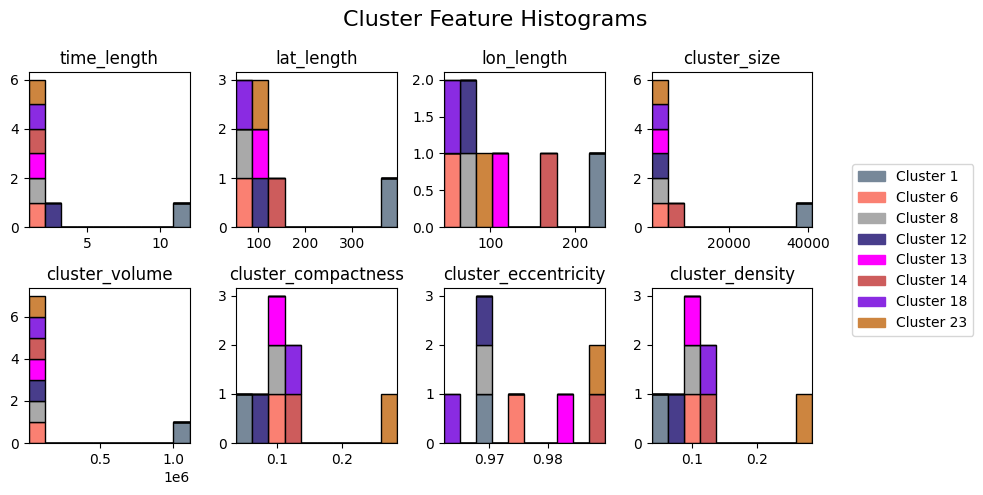

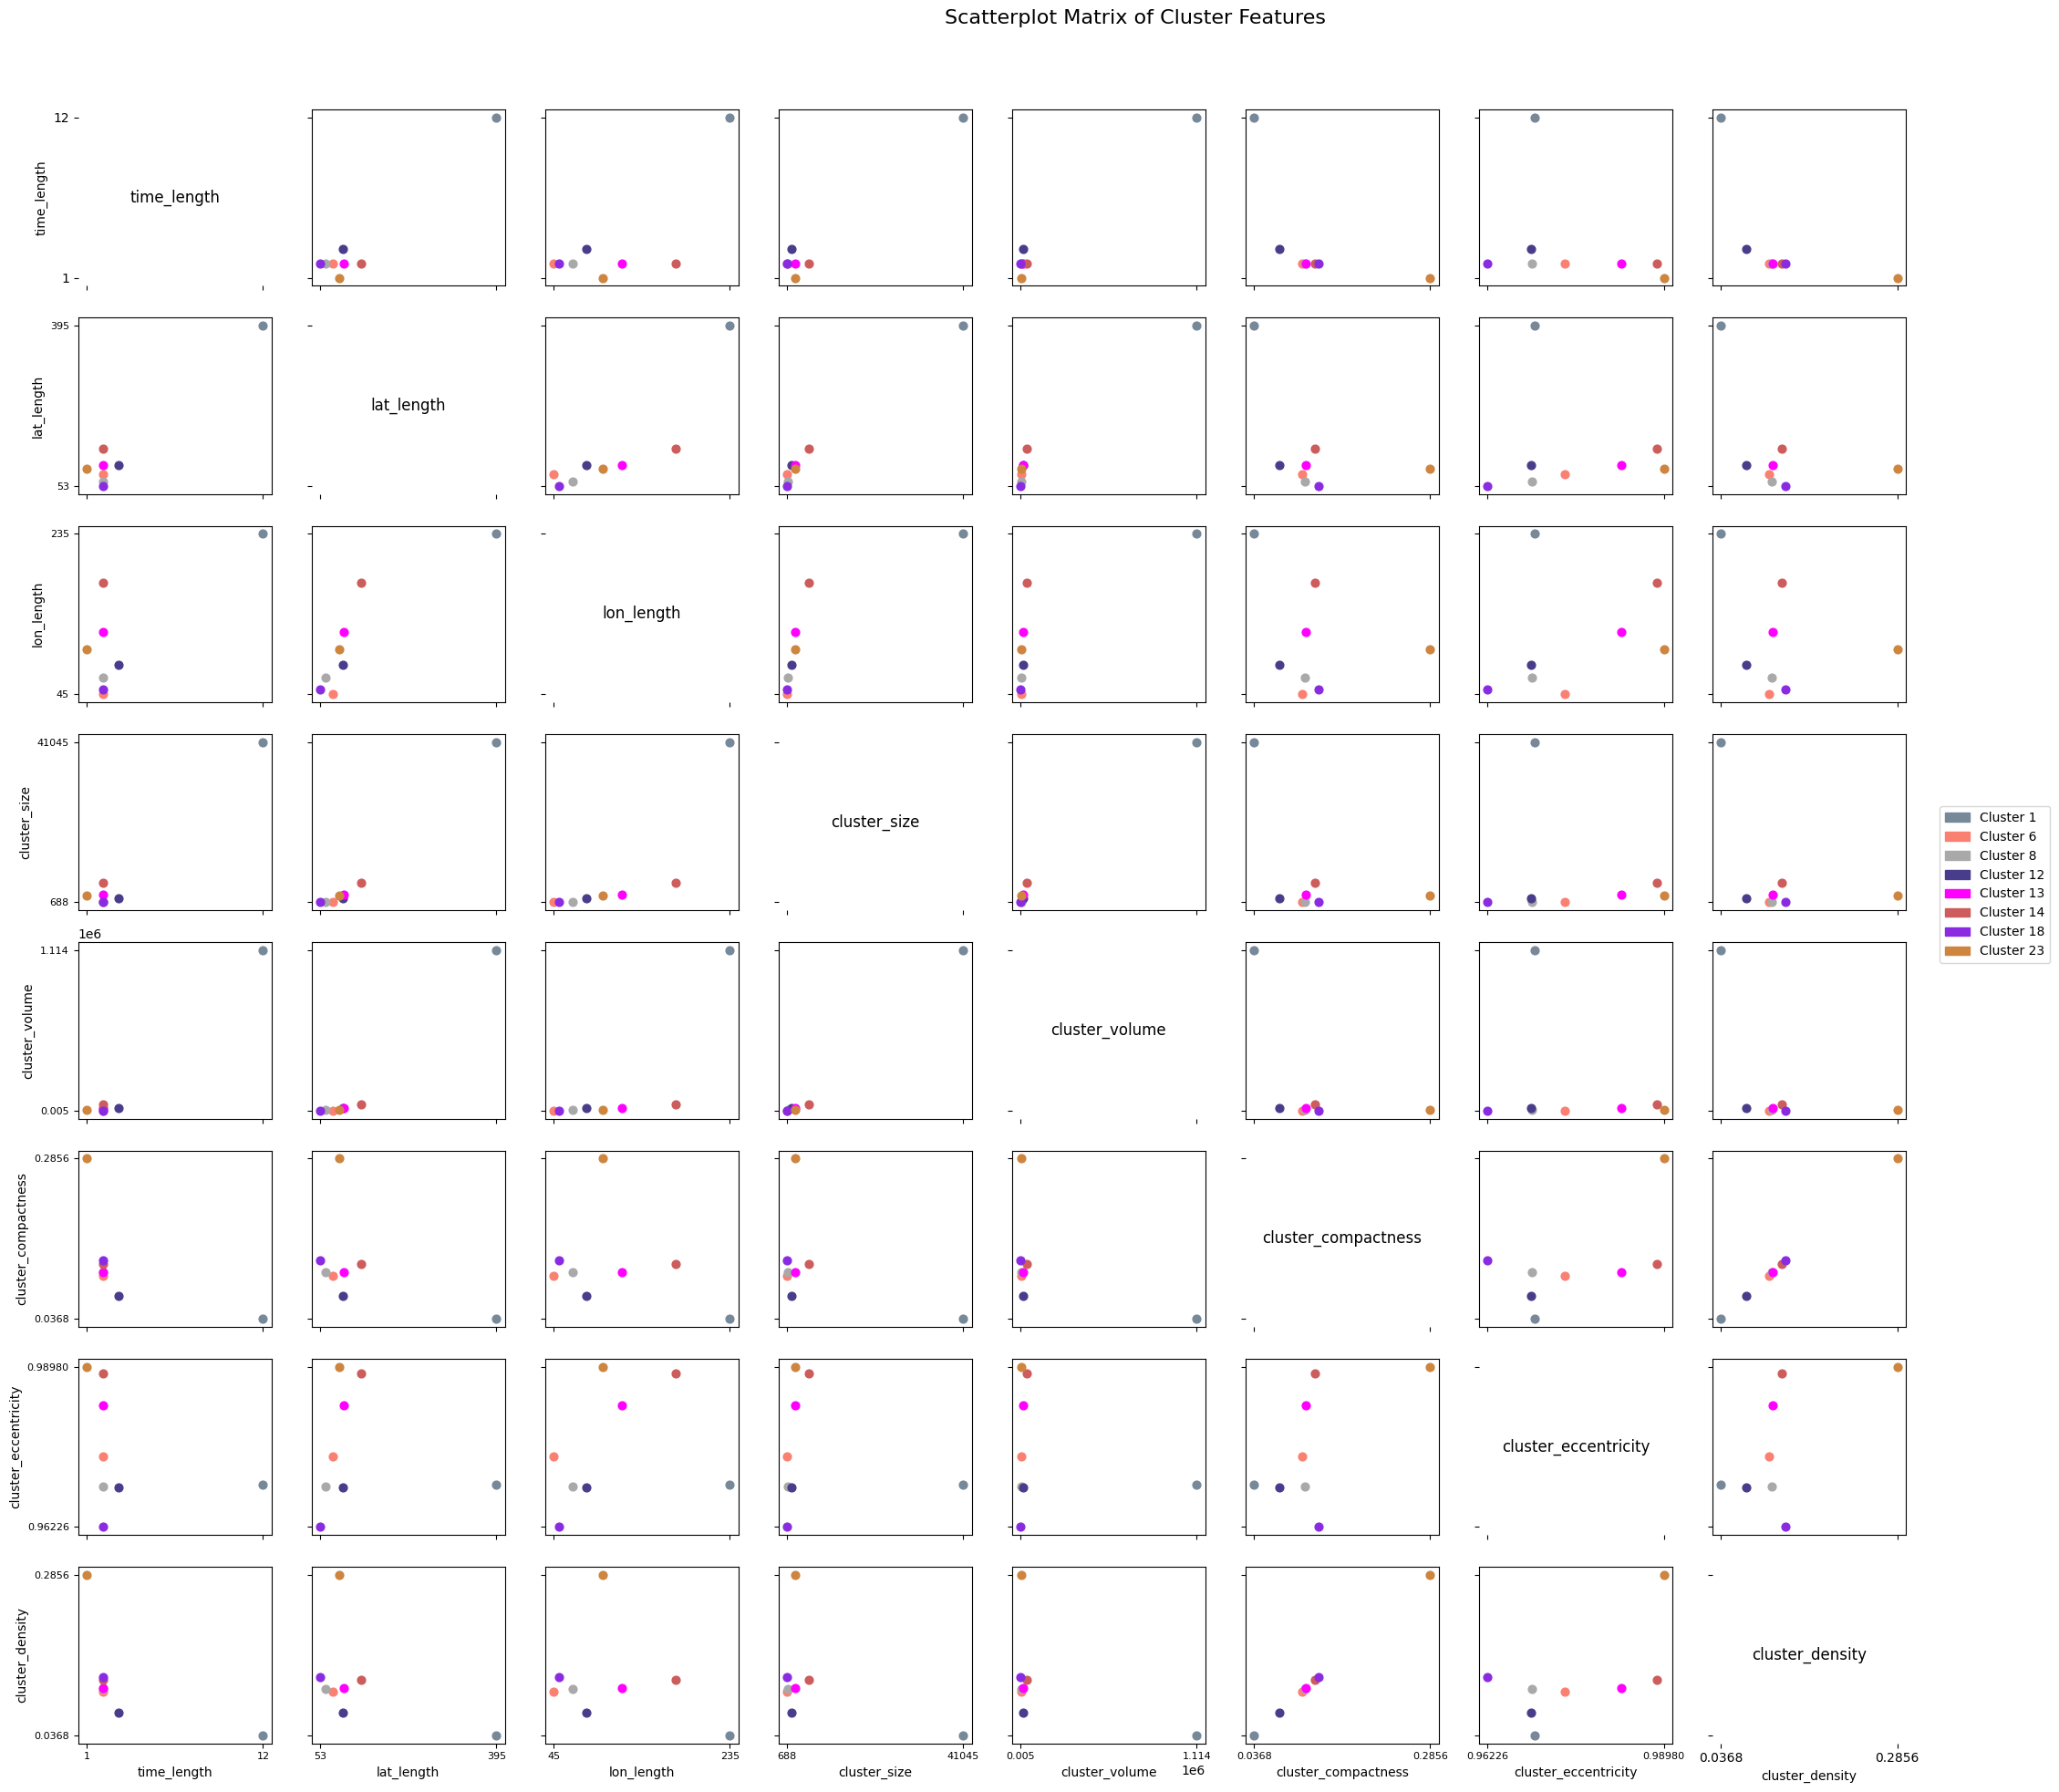




Experiment: Smaller Geo Eps
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_1_5_5_100_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        36.0        29.0         500.0          2088.0             0.239464              0.944444         0.239464
2           2.0        27.0        30.0         561.0          1620.0             0.346296              0.933333         0.346296
3           3.0       190.0       176.0       12183.0        100320.0             0.121441              0.984211         0.121441
5           4.0       134.0       149.0        7854.0         79864.0             0.098342              0.973154         0.098342
6           4.0        96.0        45.0        2562.0         17280.0             0.148264              0.958333         0.148264
14          2.0        74.0        62.0        1929.0          9176.0             0.210222              0.972973  

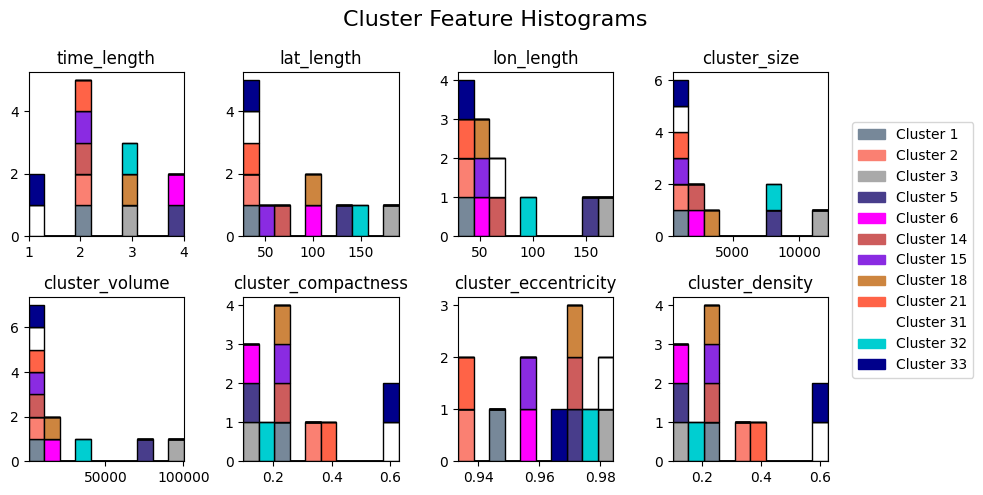

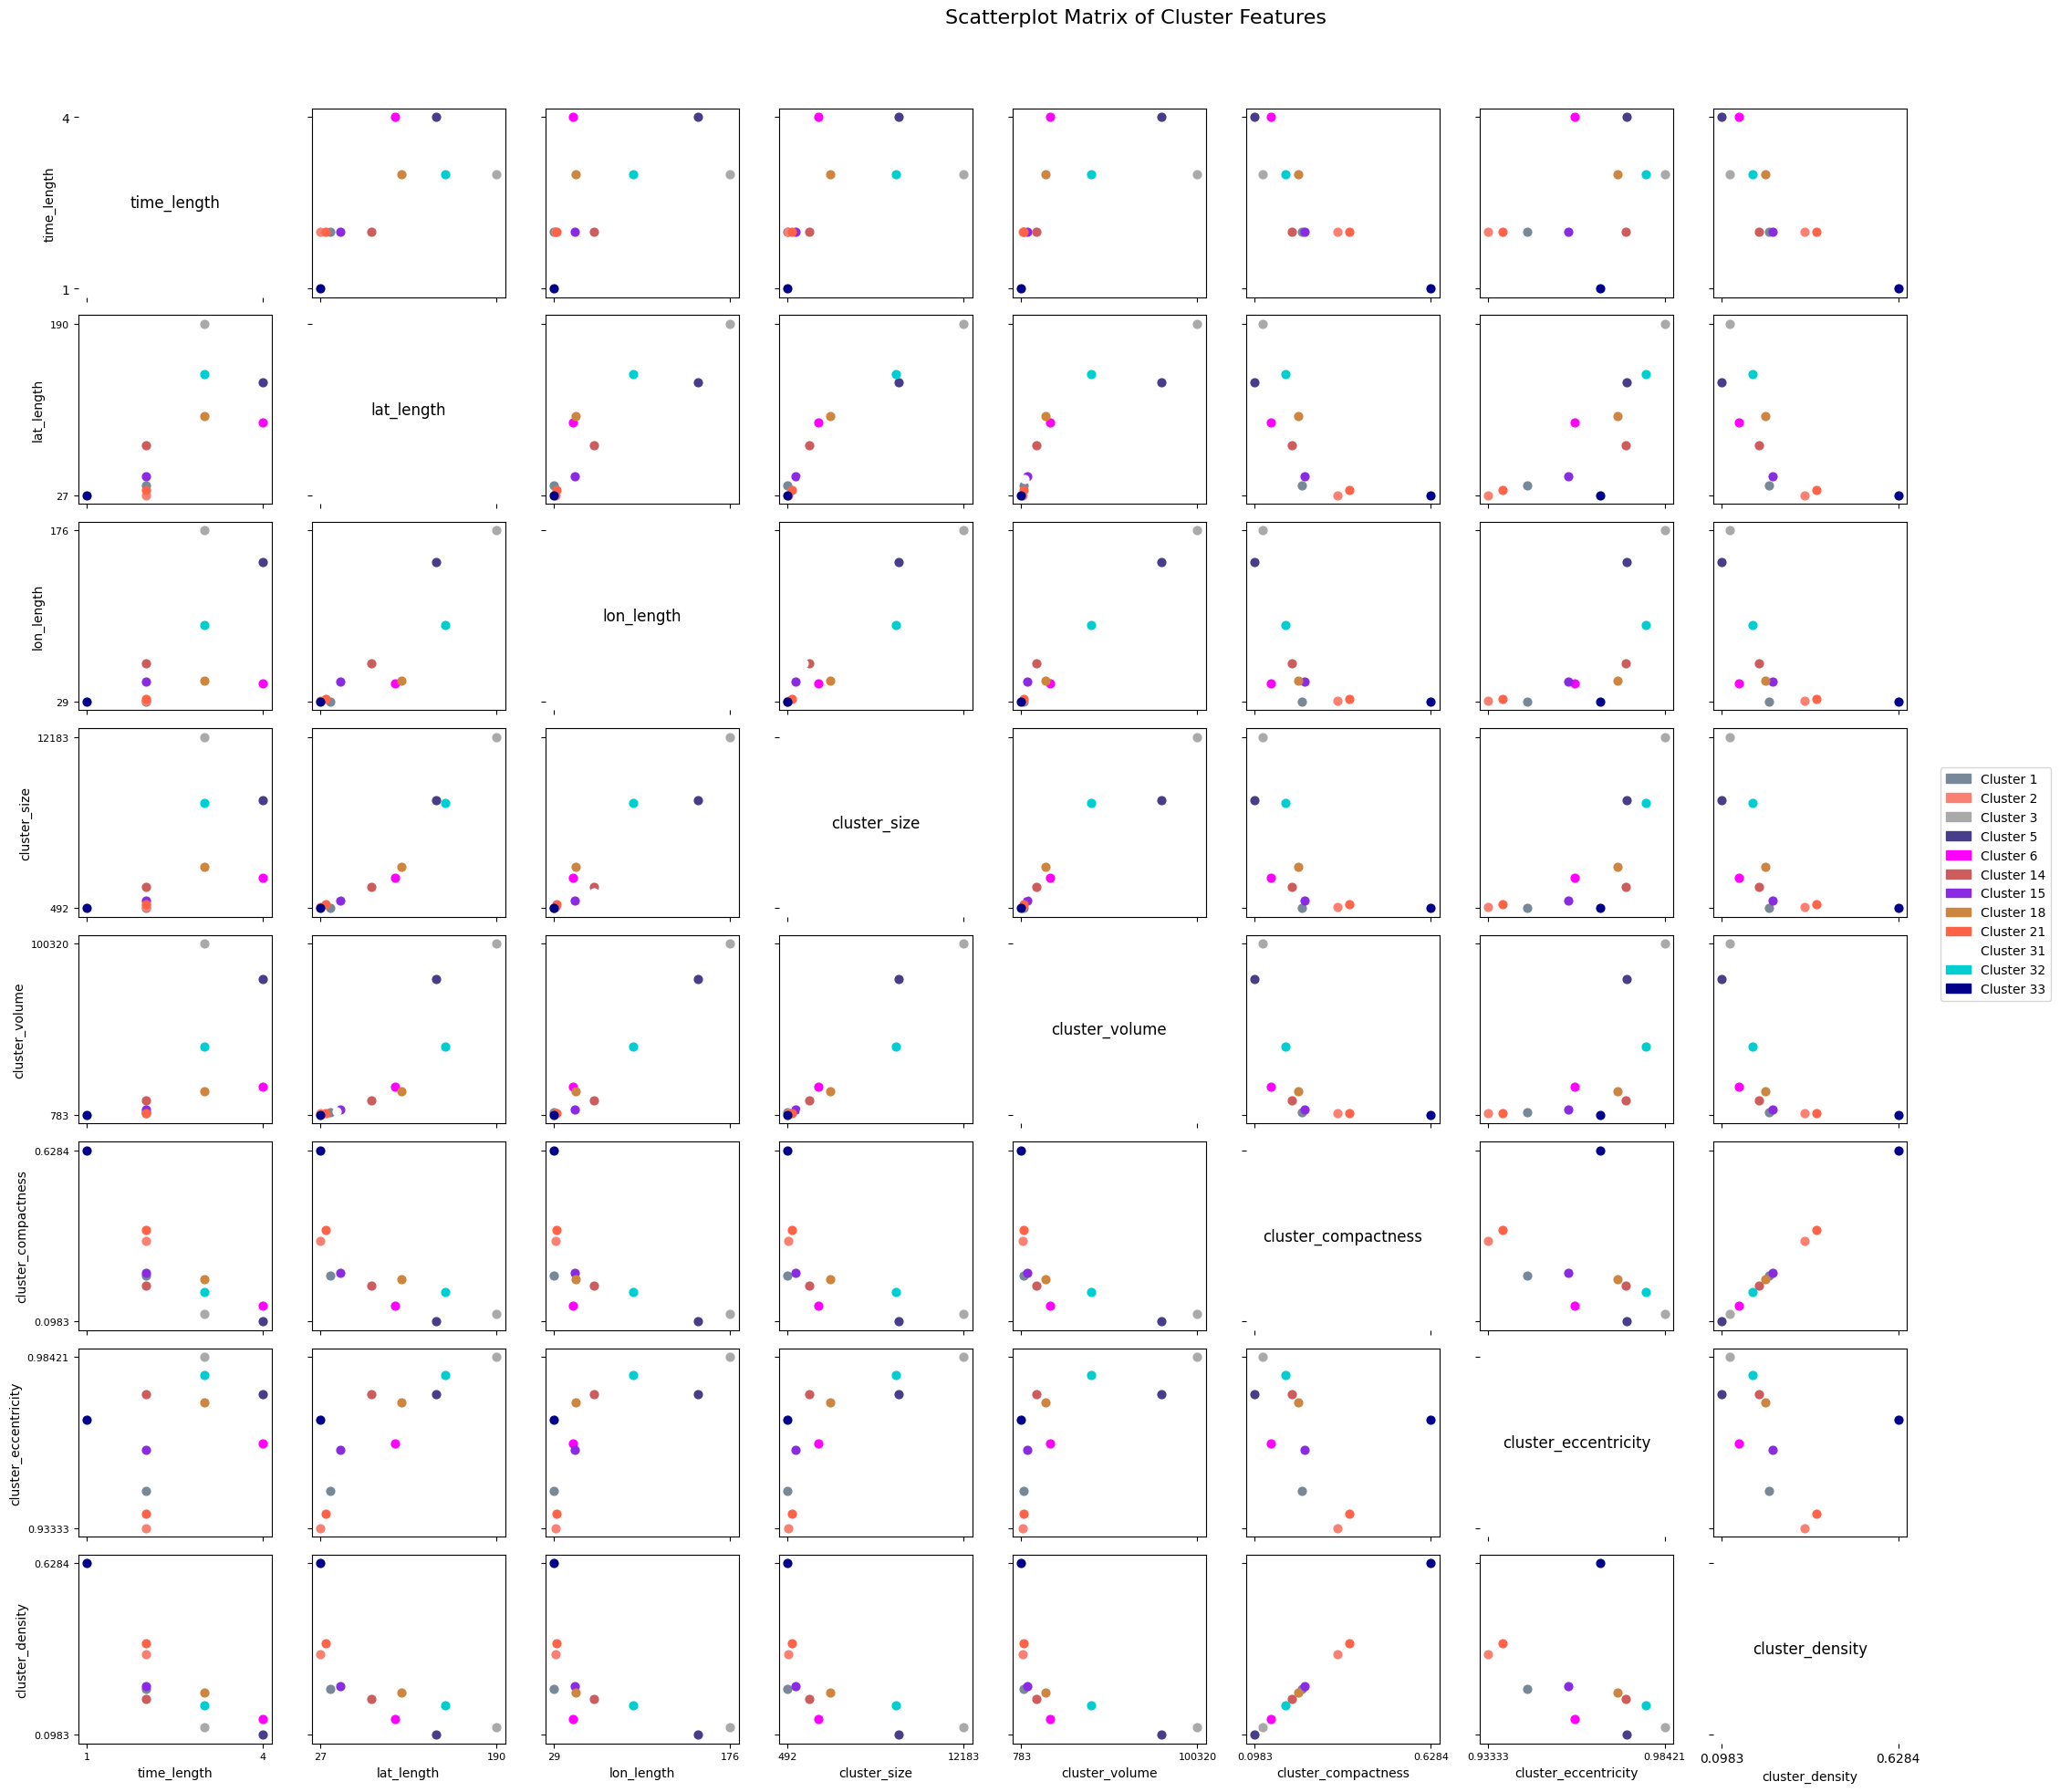




Experiment: Larger Geo Eps
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_1_20_20_100_1000.pkl
   time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1         12.0       458.0       471.0       53630.0       2588616.0             0.020718              0.974522         0.020718
2          3.0       136.0       271.0        3313.0        110568.0             0.029963              0.988930         0.029963
4          3.0       117.0       123.0        1840.0         43173.0             0.042619              0.975610         0.042619
7          1.0        99.0       112.0        2523.0         11088.0             0.227543              0.991071         0.227543


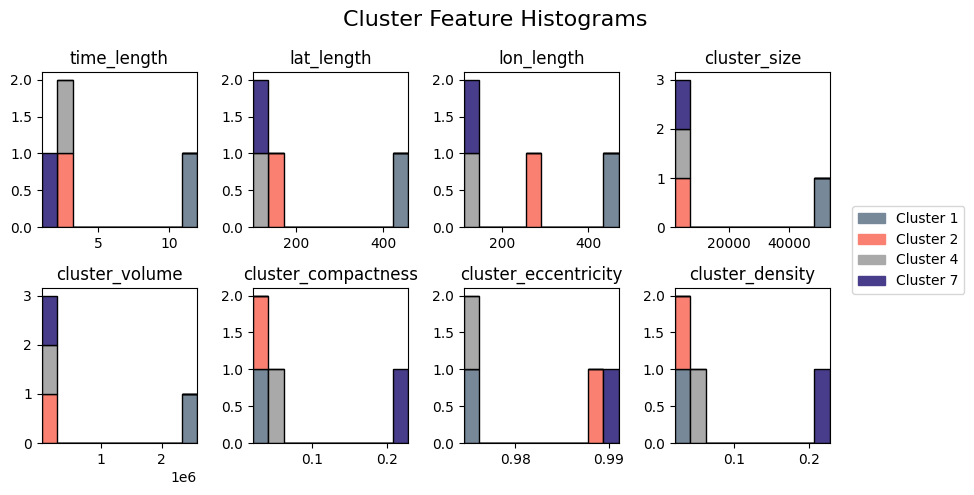

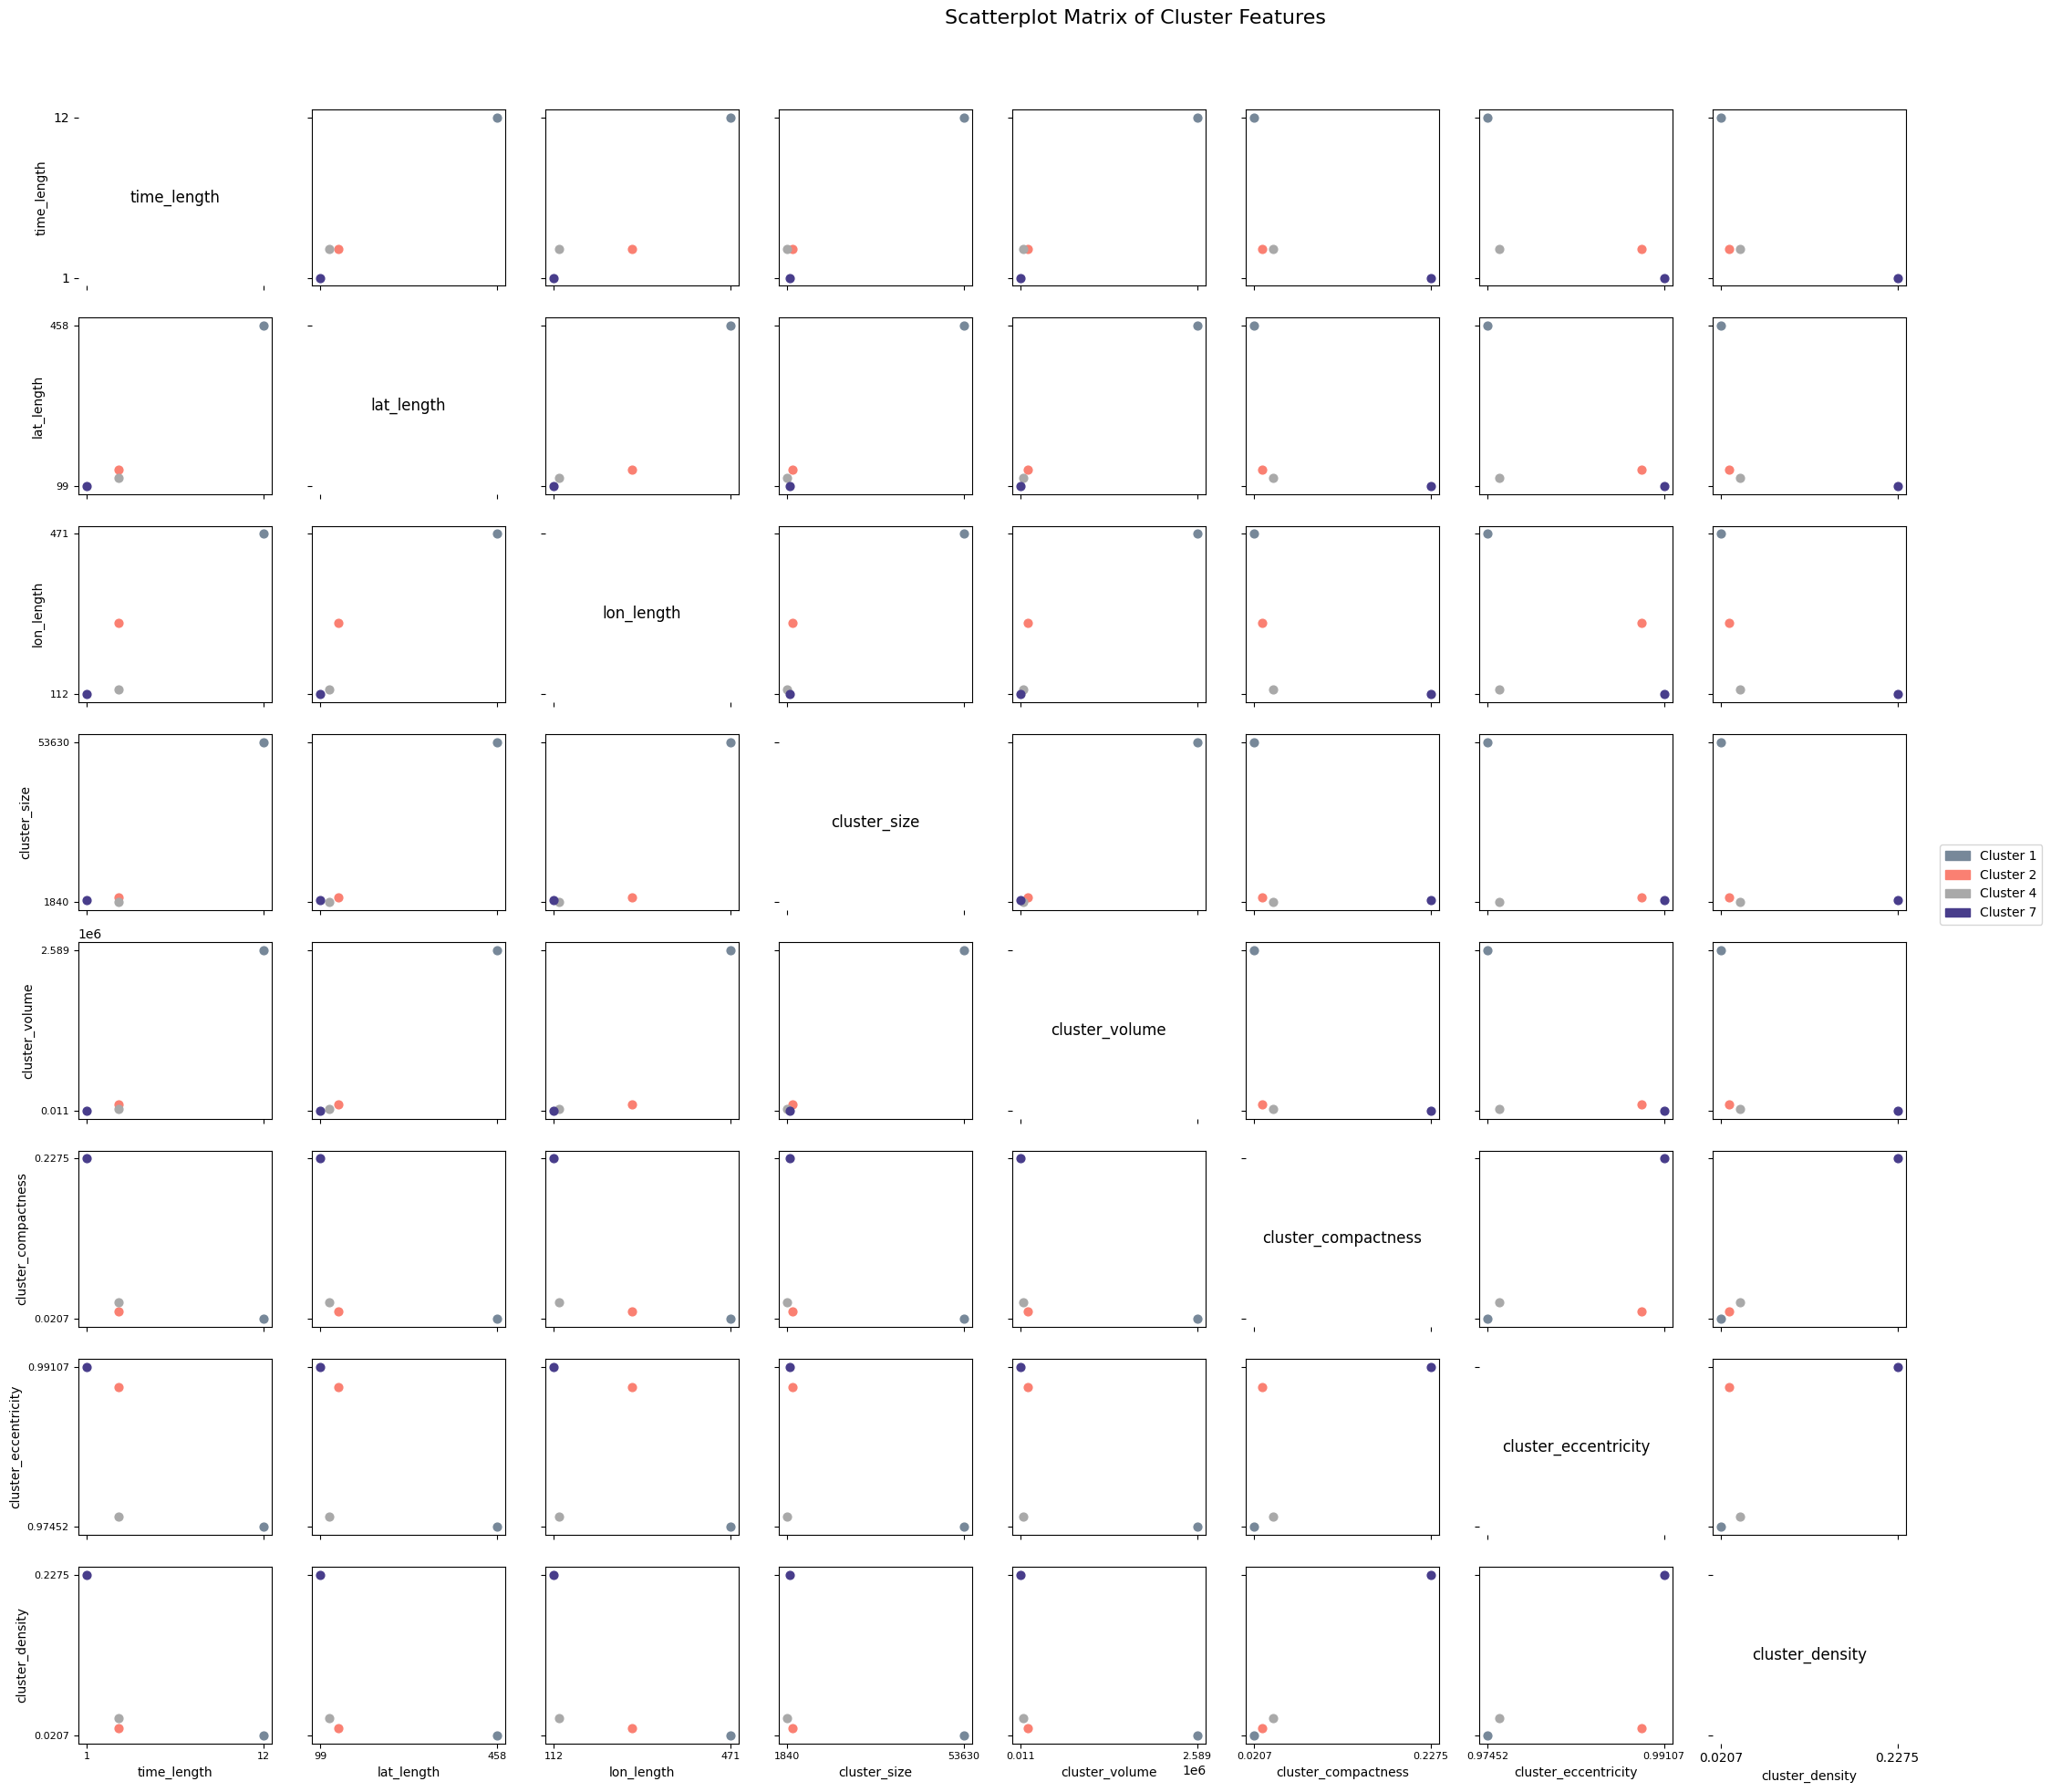




Experiment: Larger Time Eps
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_2_10_10_100_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1          12.0       395.0       376.0       47661.0       1782240.0             0.026742              0.969620         0.026742
3           4.0       132.0       177.0        5860.0         93456.0             0.062703              0.977401         0.062703
5           2.0        78.0        45.0         731.0          7020.0             0.104131              0.974359         0.104131
7           2.0        63.0        65.0         894.0          8190.0             0.109158              0.969231         0.109158
11          3.0        97.0        80.0        1676.0         23280.0             0.071993              0.969072         0.071993


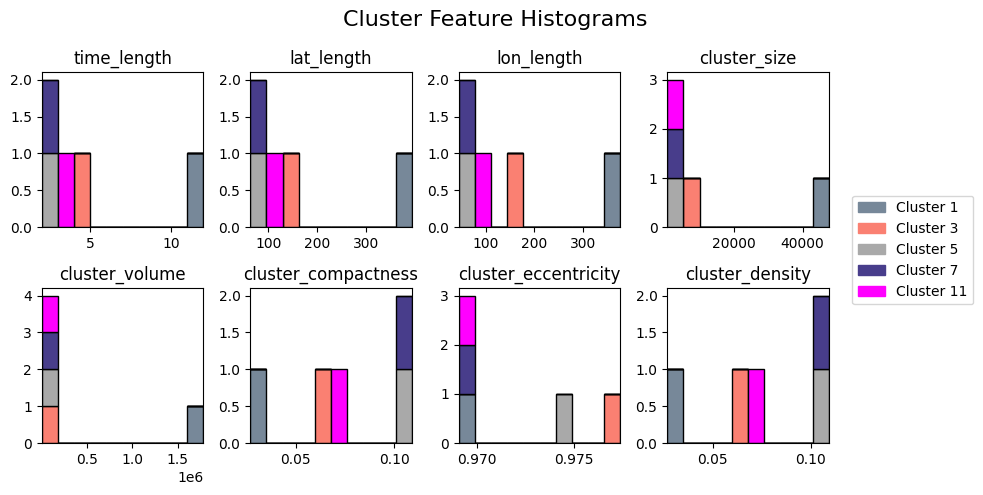

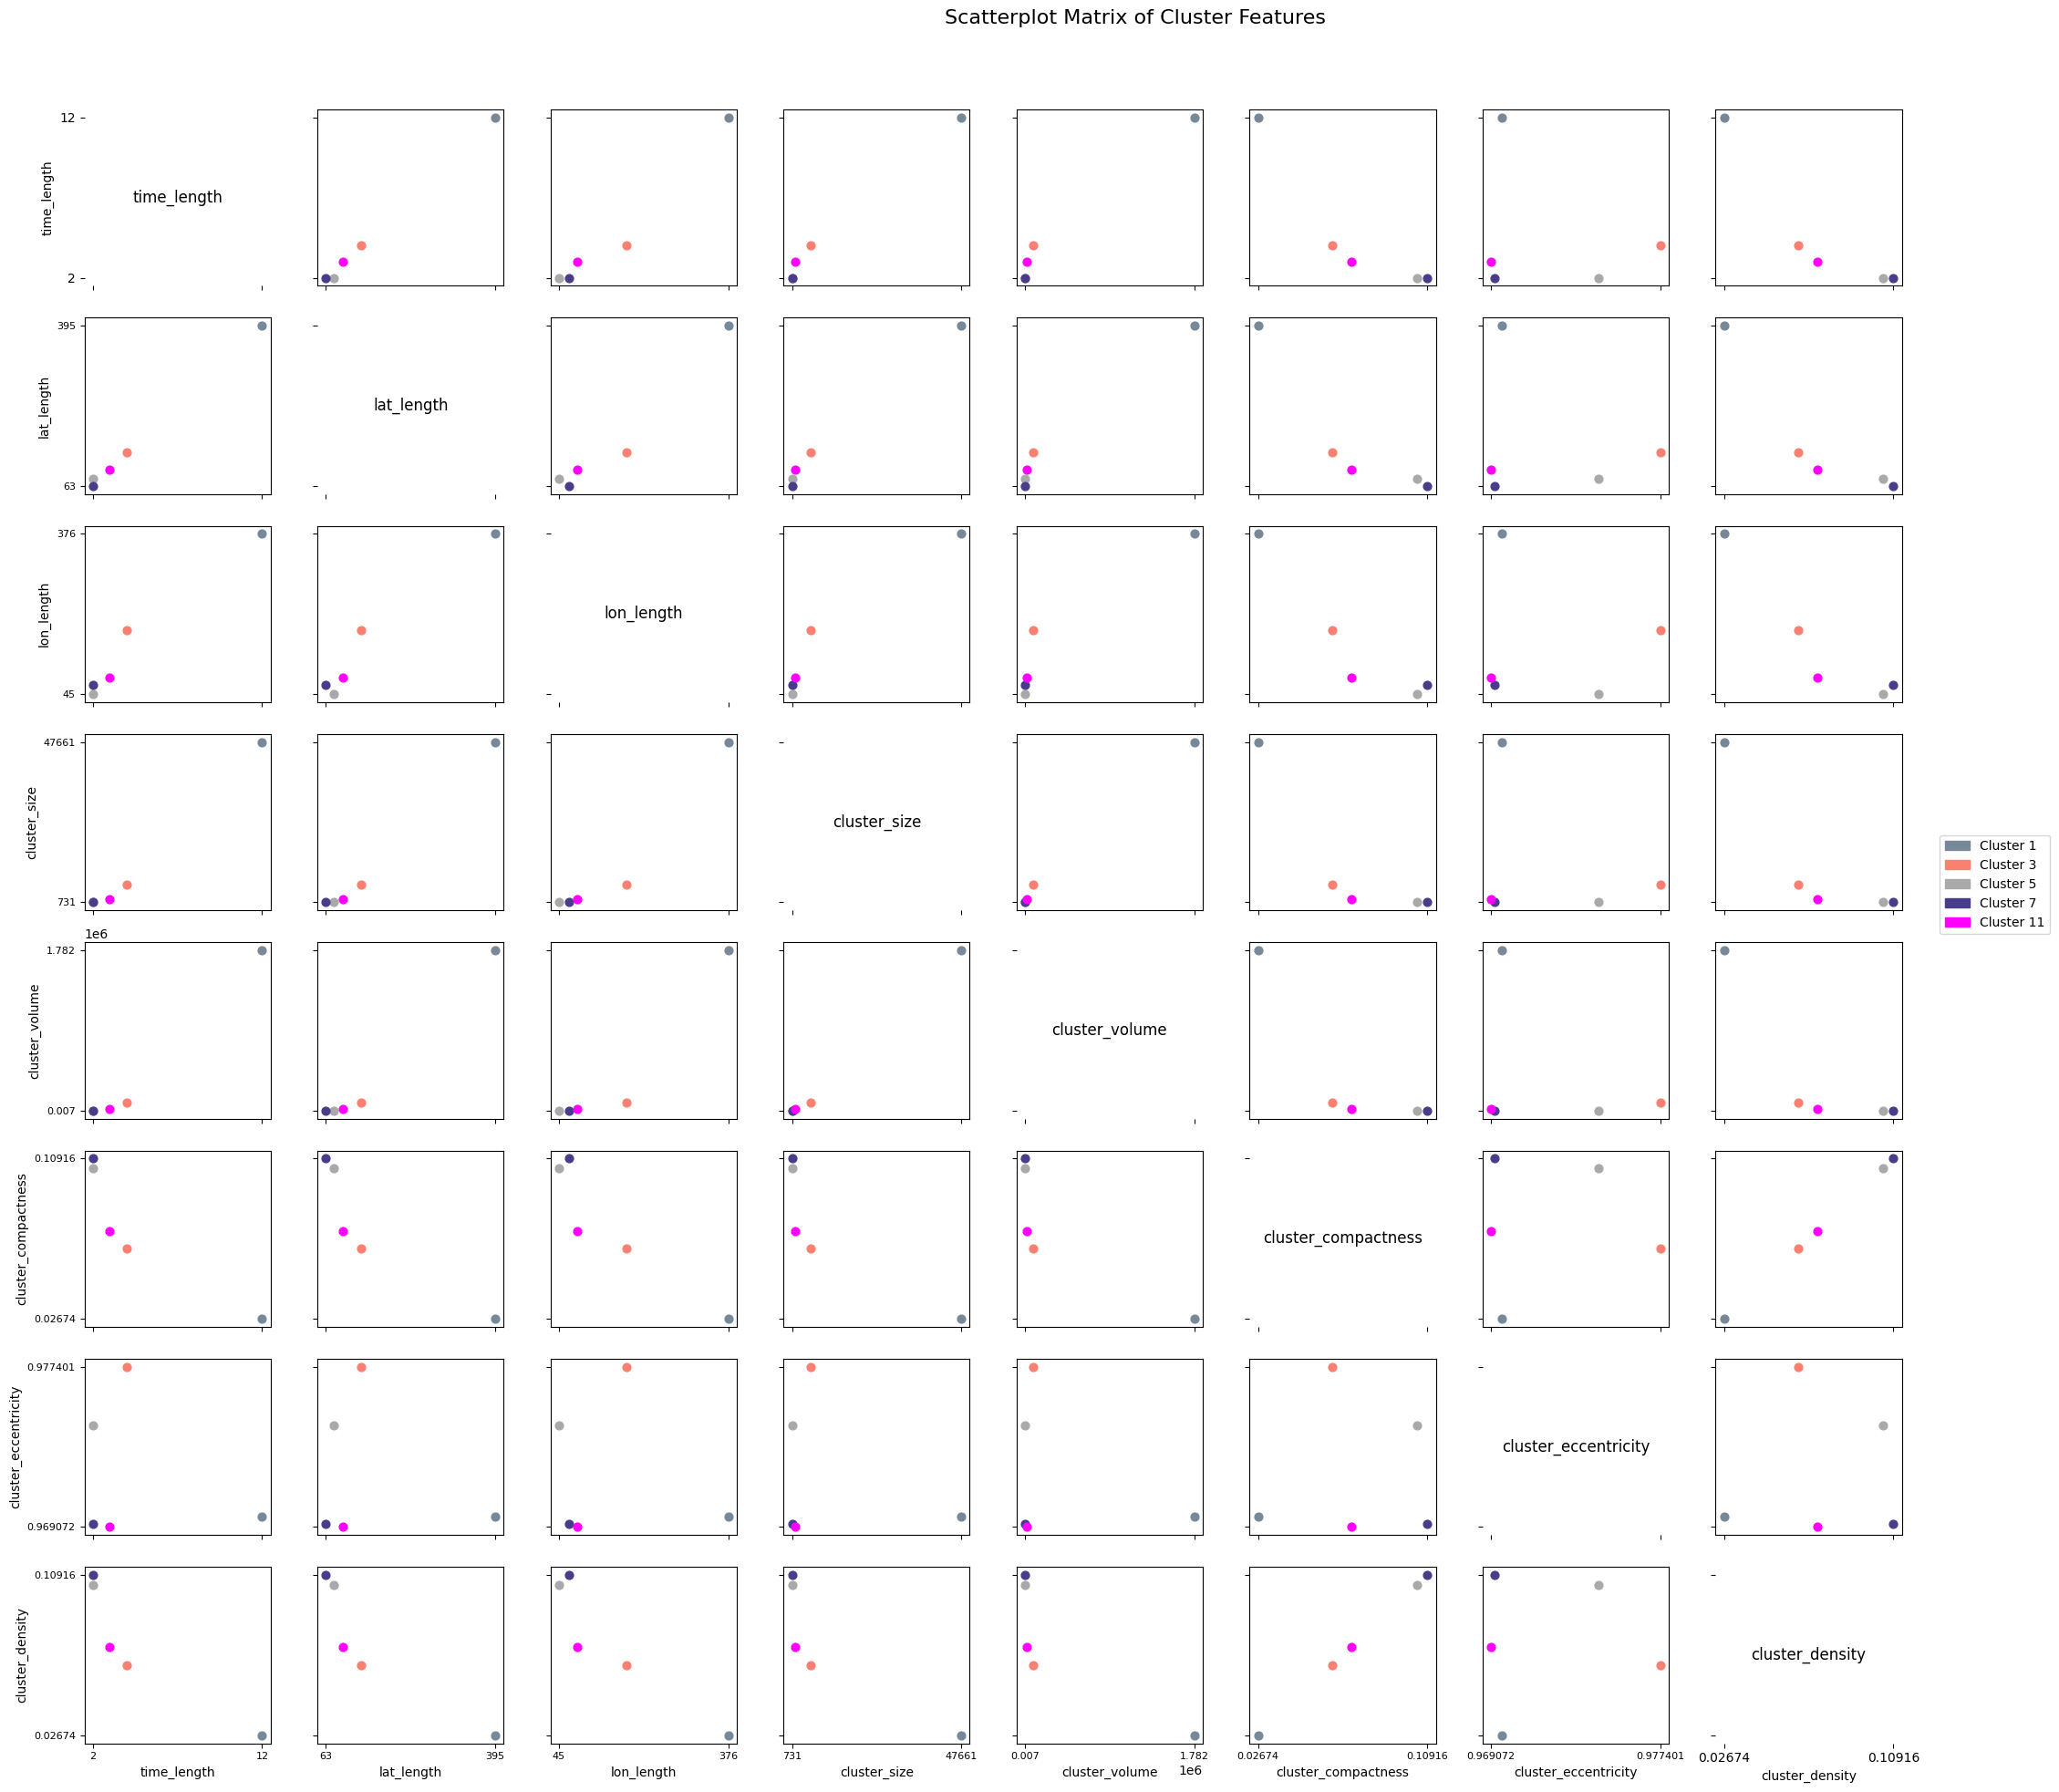




Experiment: Much Larger Time Eps
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_10_10_10_100_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1          12.0       395.0       376.0       48584.0       1782240.0             0.027260              0.969620         0.027260
4           4.0       132.0       177.0        5898.0         93456.0             0.063110              0.977401         0.063110
6           7.0        78.0        45.0         733.0         24570.0             0.029833              0.910256         0.029833
8           6.0        65.0        65.0         903.0         25350.0             0.035621              0.907692         0.035621
11          7.0        97.0        80.0        1682.0         54320.0             0.030965              0.927835         0.030965


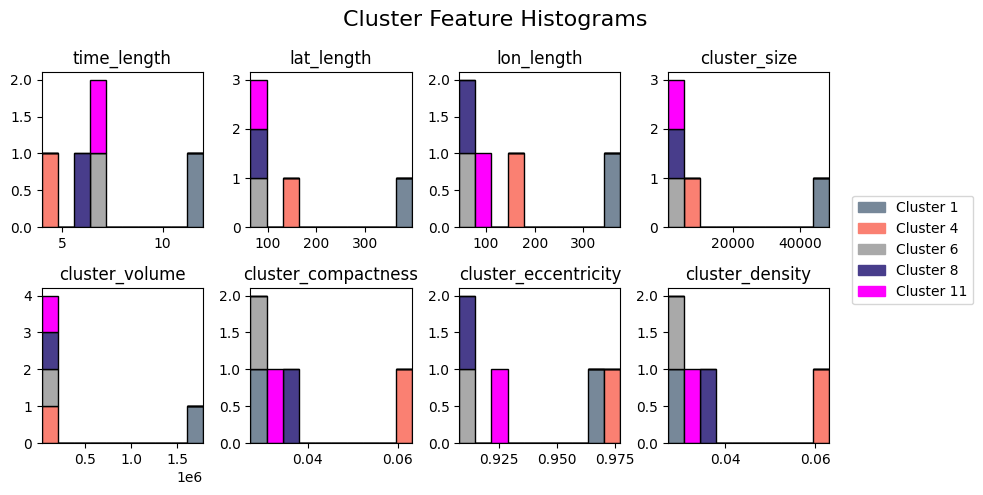

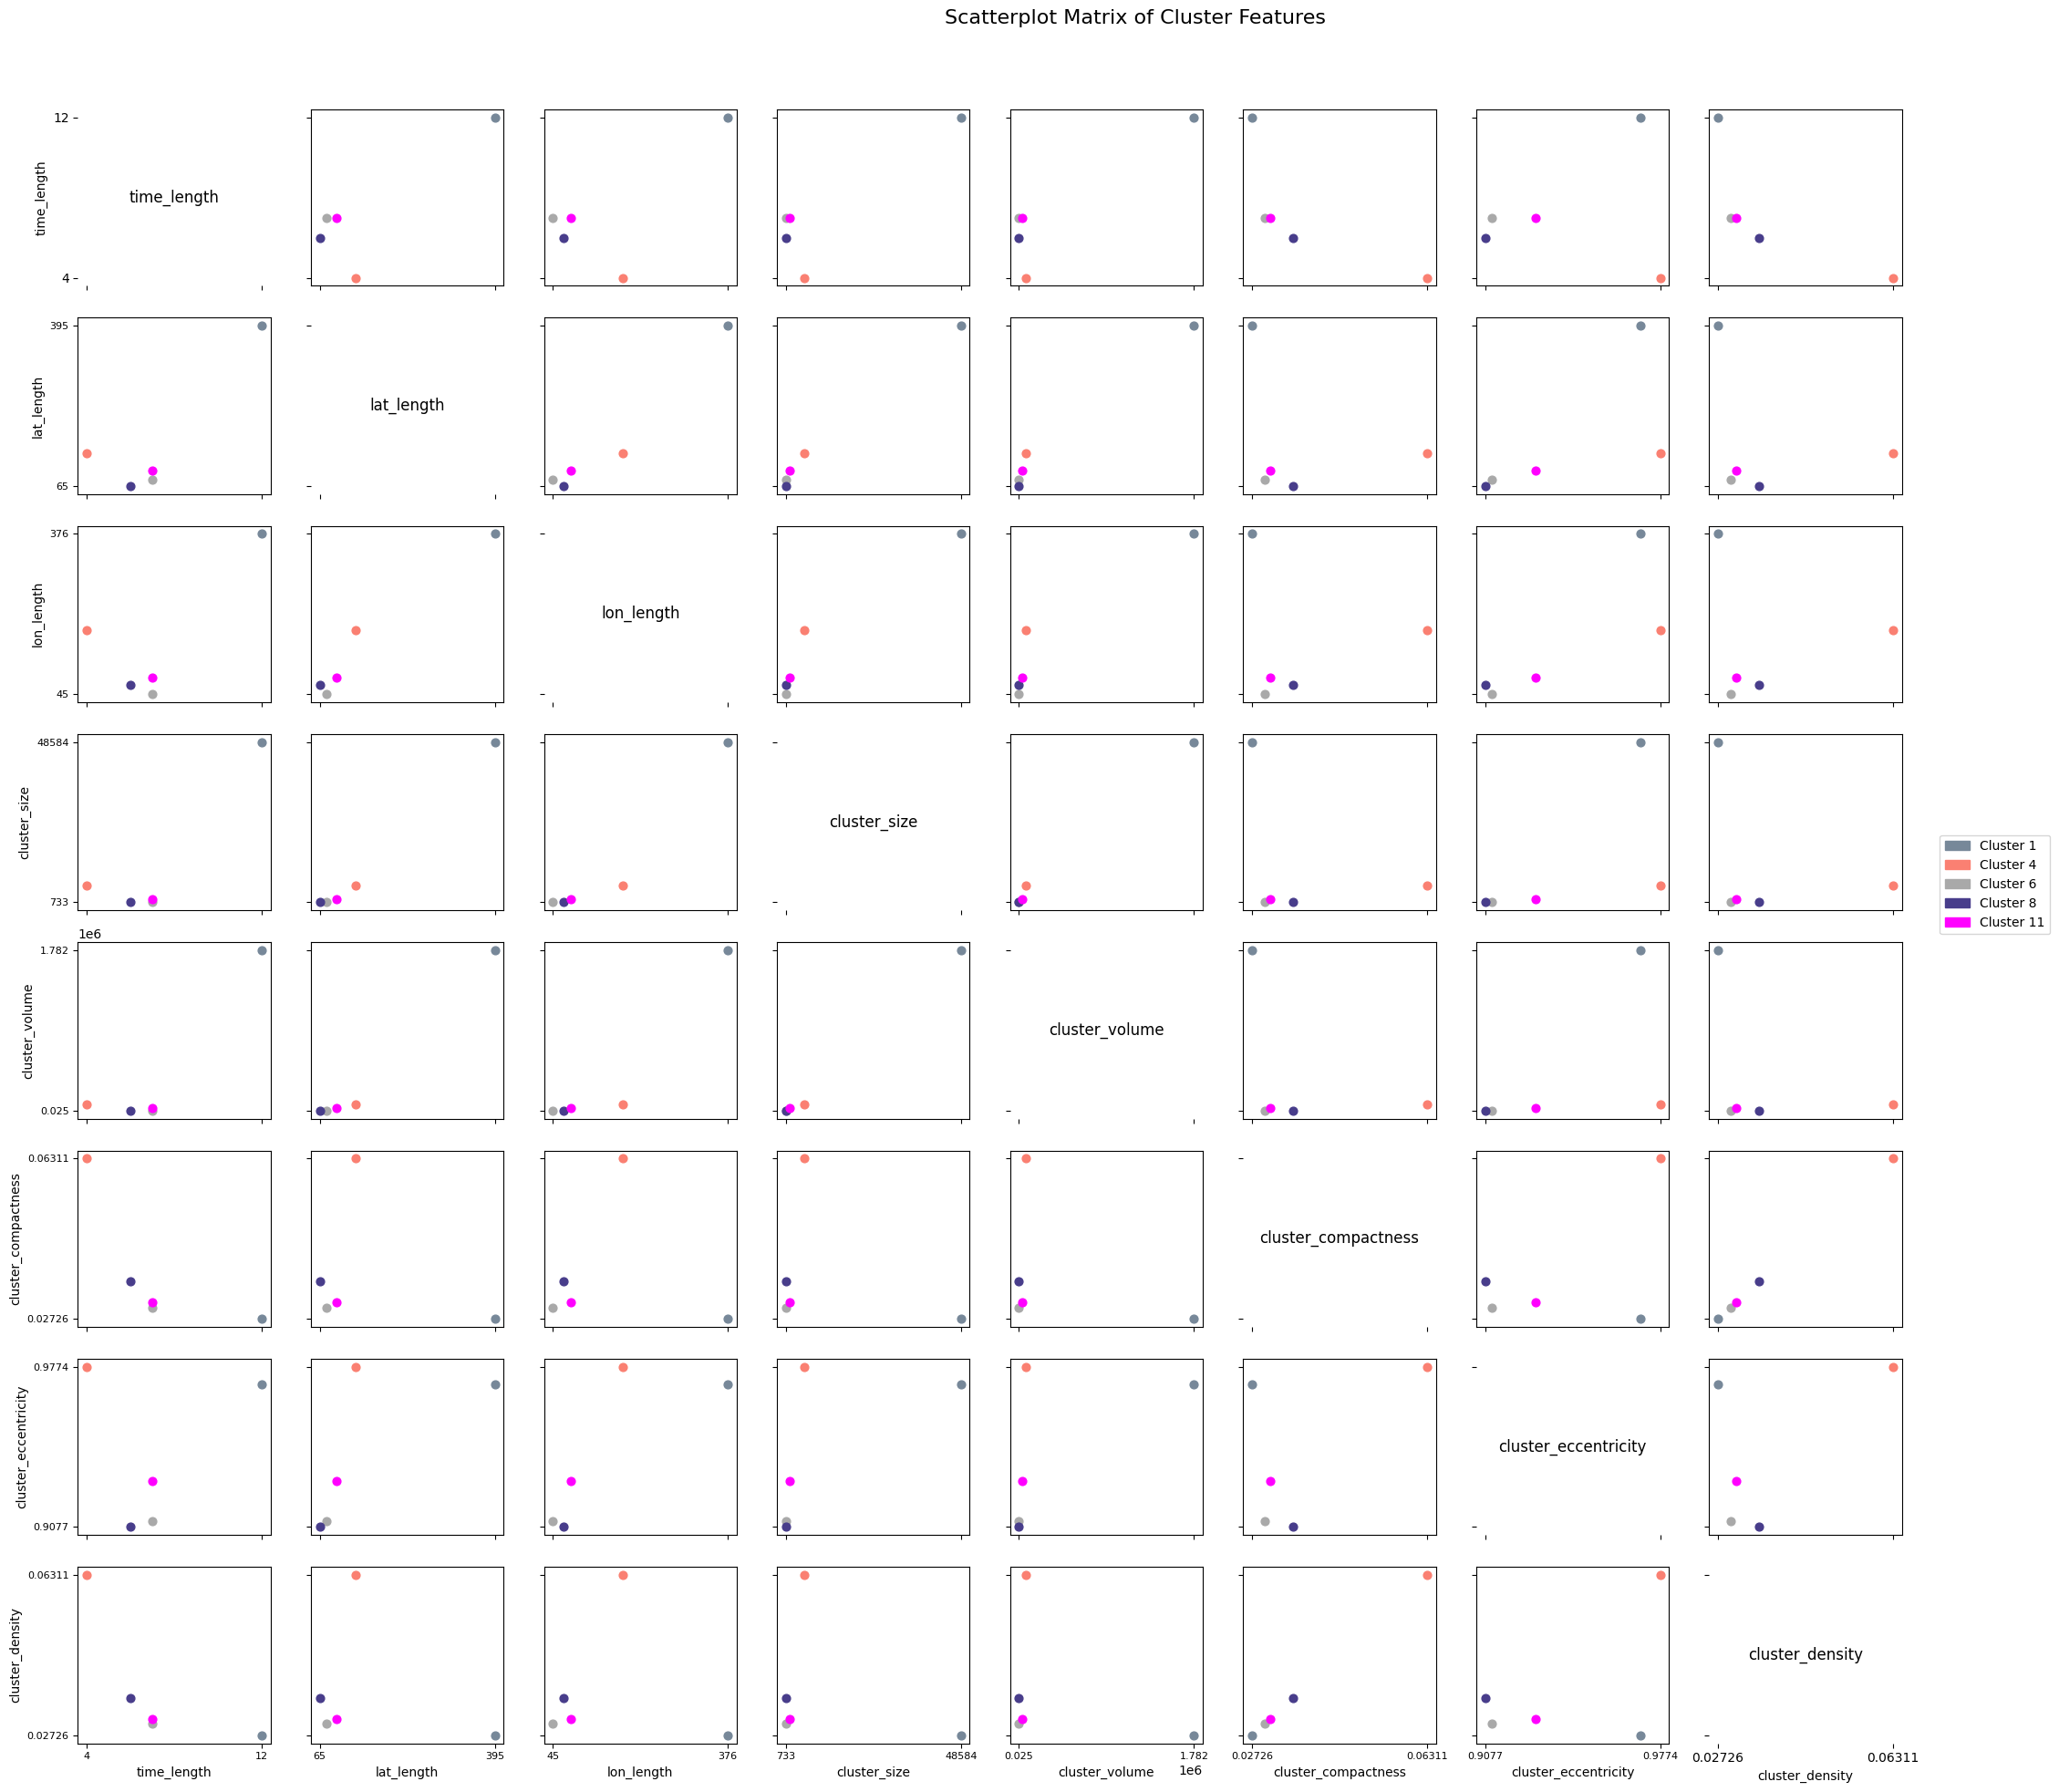




Experiment: Smaller MinNeighbors
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_1_10_10_50_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
2          12.0       395.0       318.0       44808.0       1507320.0             0.029727              0.969620         0.029727
6           2.0        79.0        45.0         774.0          7110.0             0.108861              0.974684         0.108861
8           2.0       108.0        89.0         898.0         19224.0             0.046712              0.981481         0.046712
9           2.0        77.0        89.0        1109.0         13706.0             0.080913              0.977528         0.080913
10          3.0        97.0        85.0        1696.0         24735.0             0.068567              0.969072         0.068567
15          2.0       140.0       176.0        5768.0         49280.0             0.117045              0.98

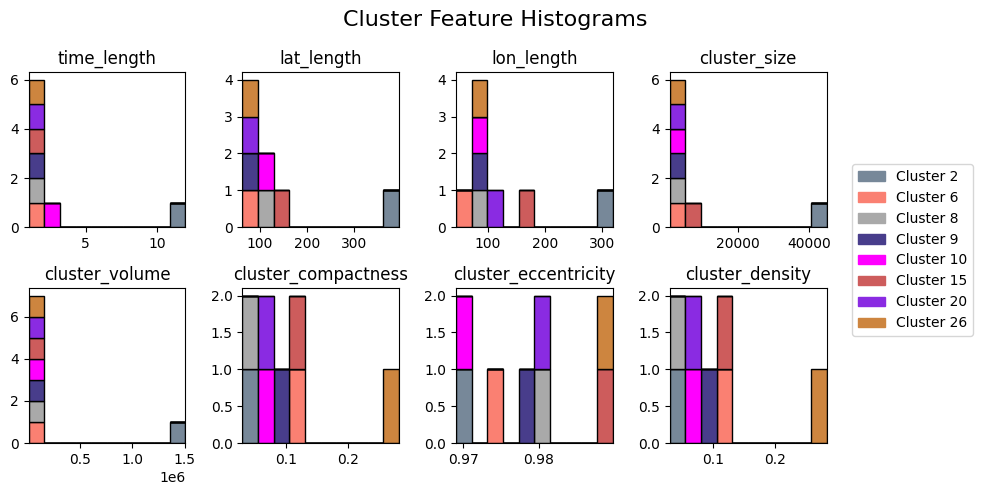

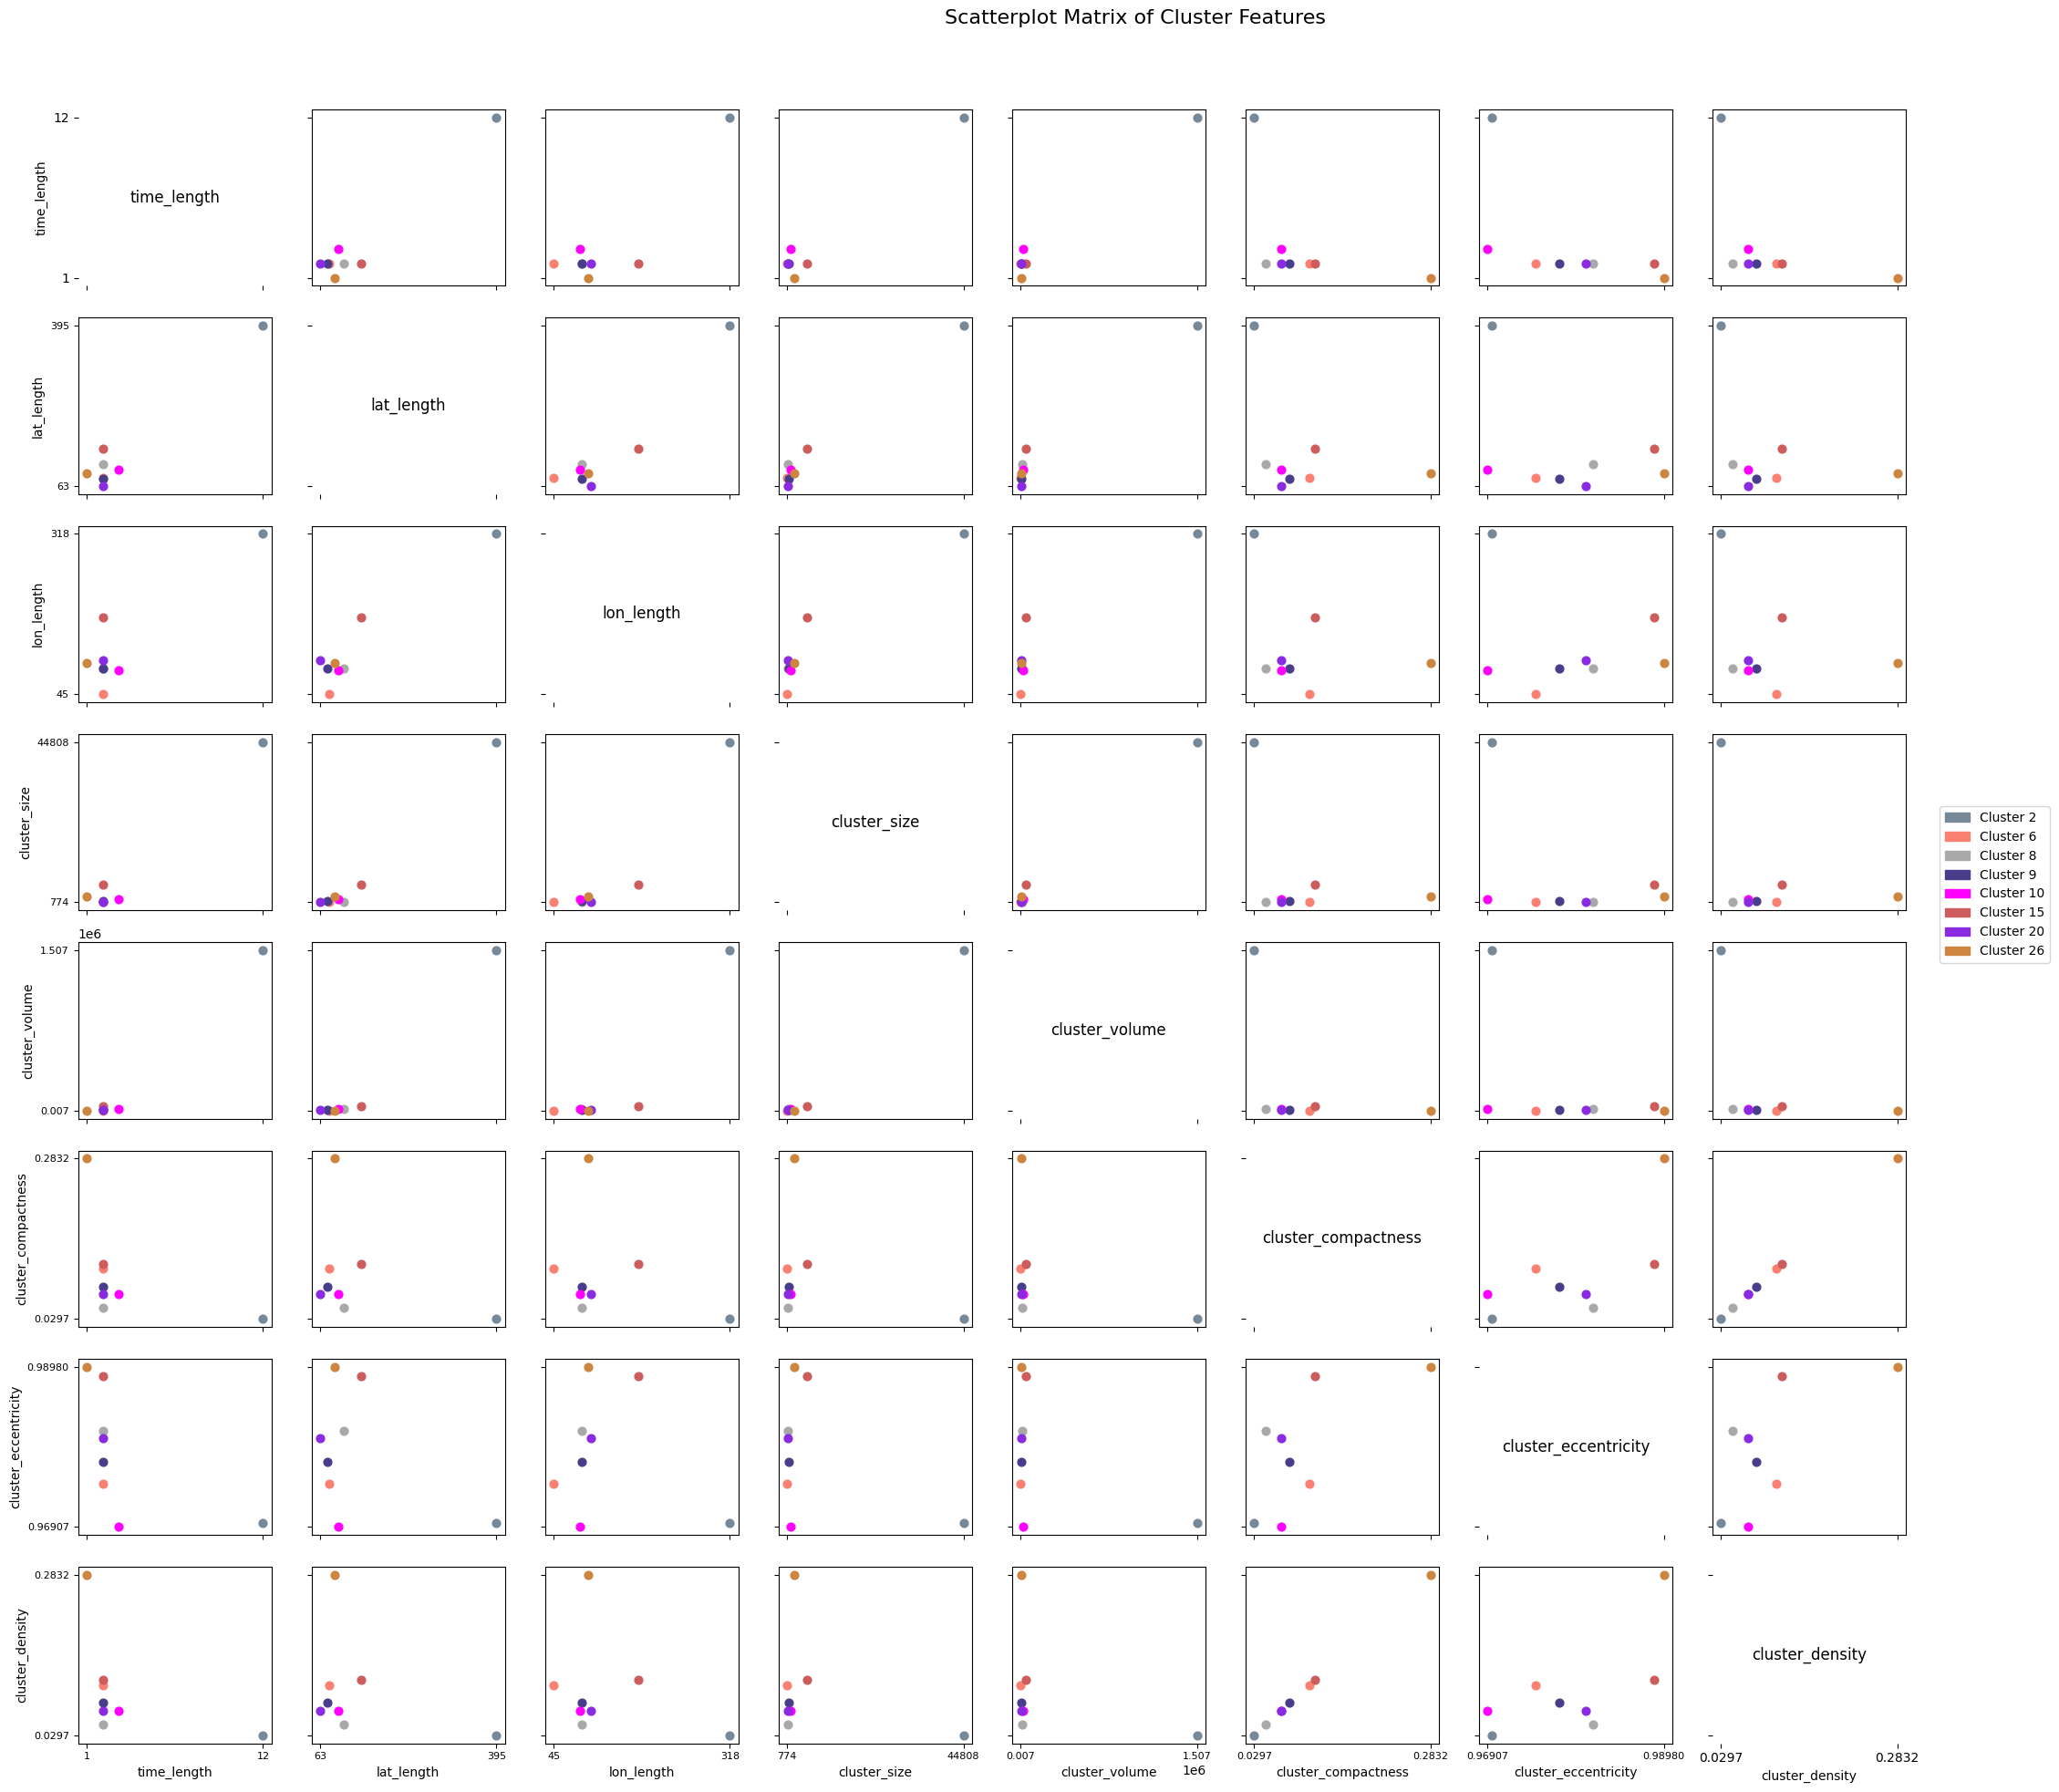




Experiment: Larger MinNeighbors
File: clustering_experiment_2018-01-01_2018-12-01_sst_2_1_10_10_200_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        52.0        37.0         613.0          3848.0             0.159304              0.961538         0.159304
2           2.0        42.0        35.0         661.0          2940.0             0.224830              0.952381         0.224830
3           3.0       197.0       188.0       12733.0        111108.0             0.114600              0.984772         0.114600
5           4.0       179.0       172.0        9499.0        123152.0             0.077132              0.977654         0.077132
6           4.0       121.0        61.0        3037.0         29524.0             0.102865              0.966942         0.102865
8           2.0        57.0        51.0         848.0          5814.0             0.145855              0.96

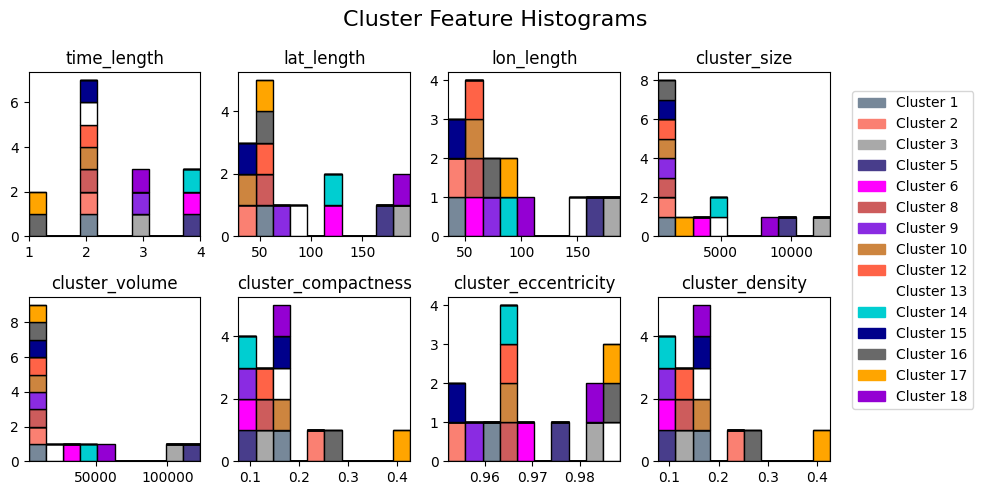

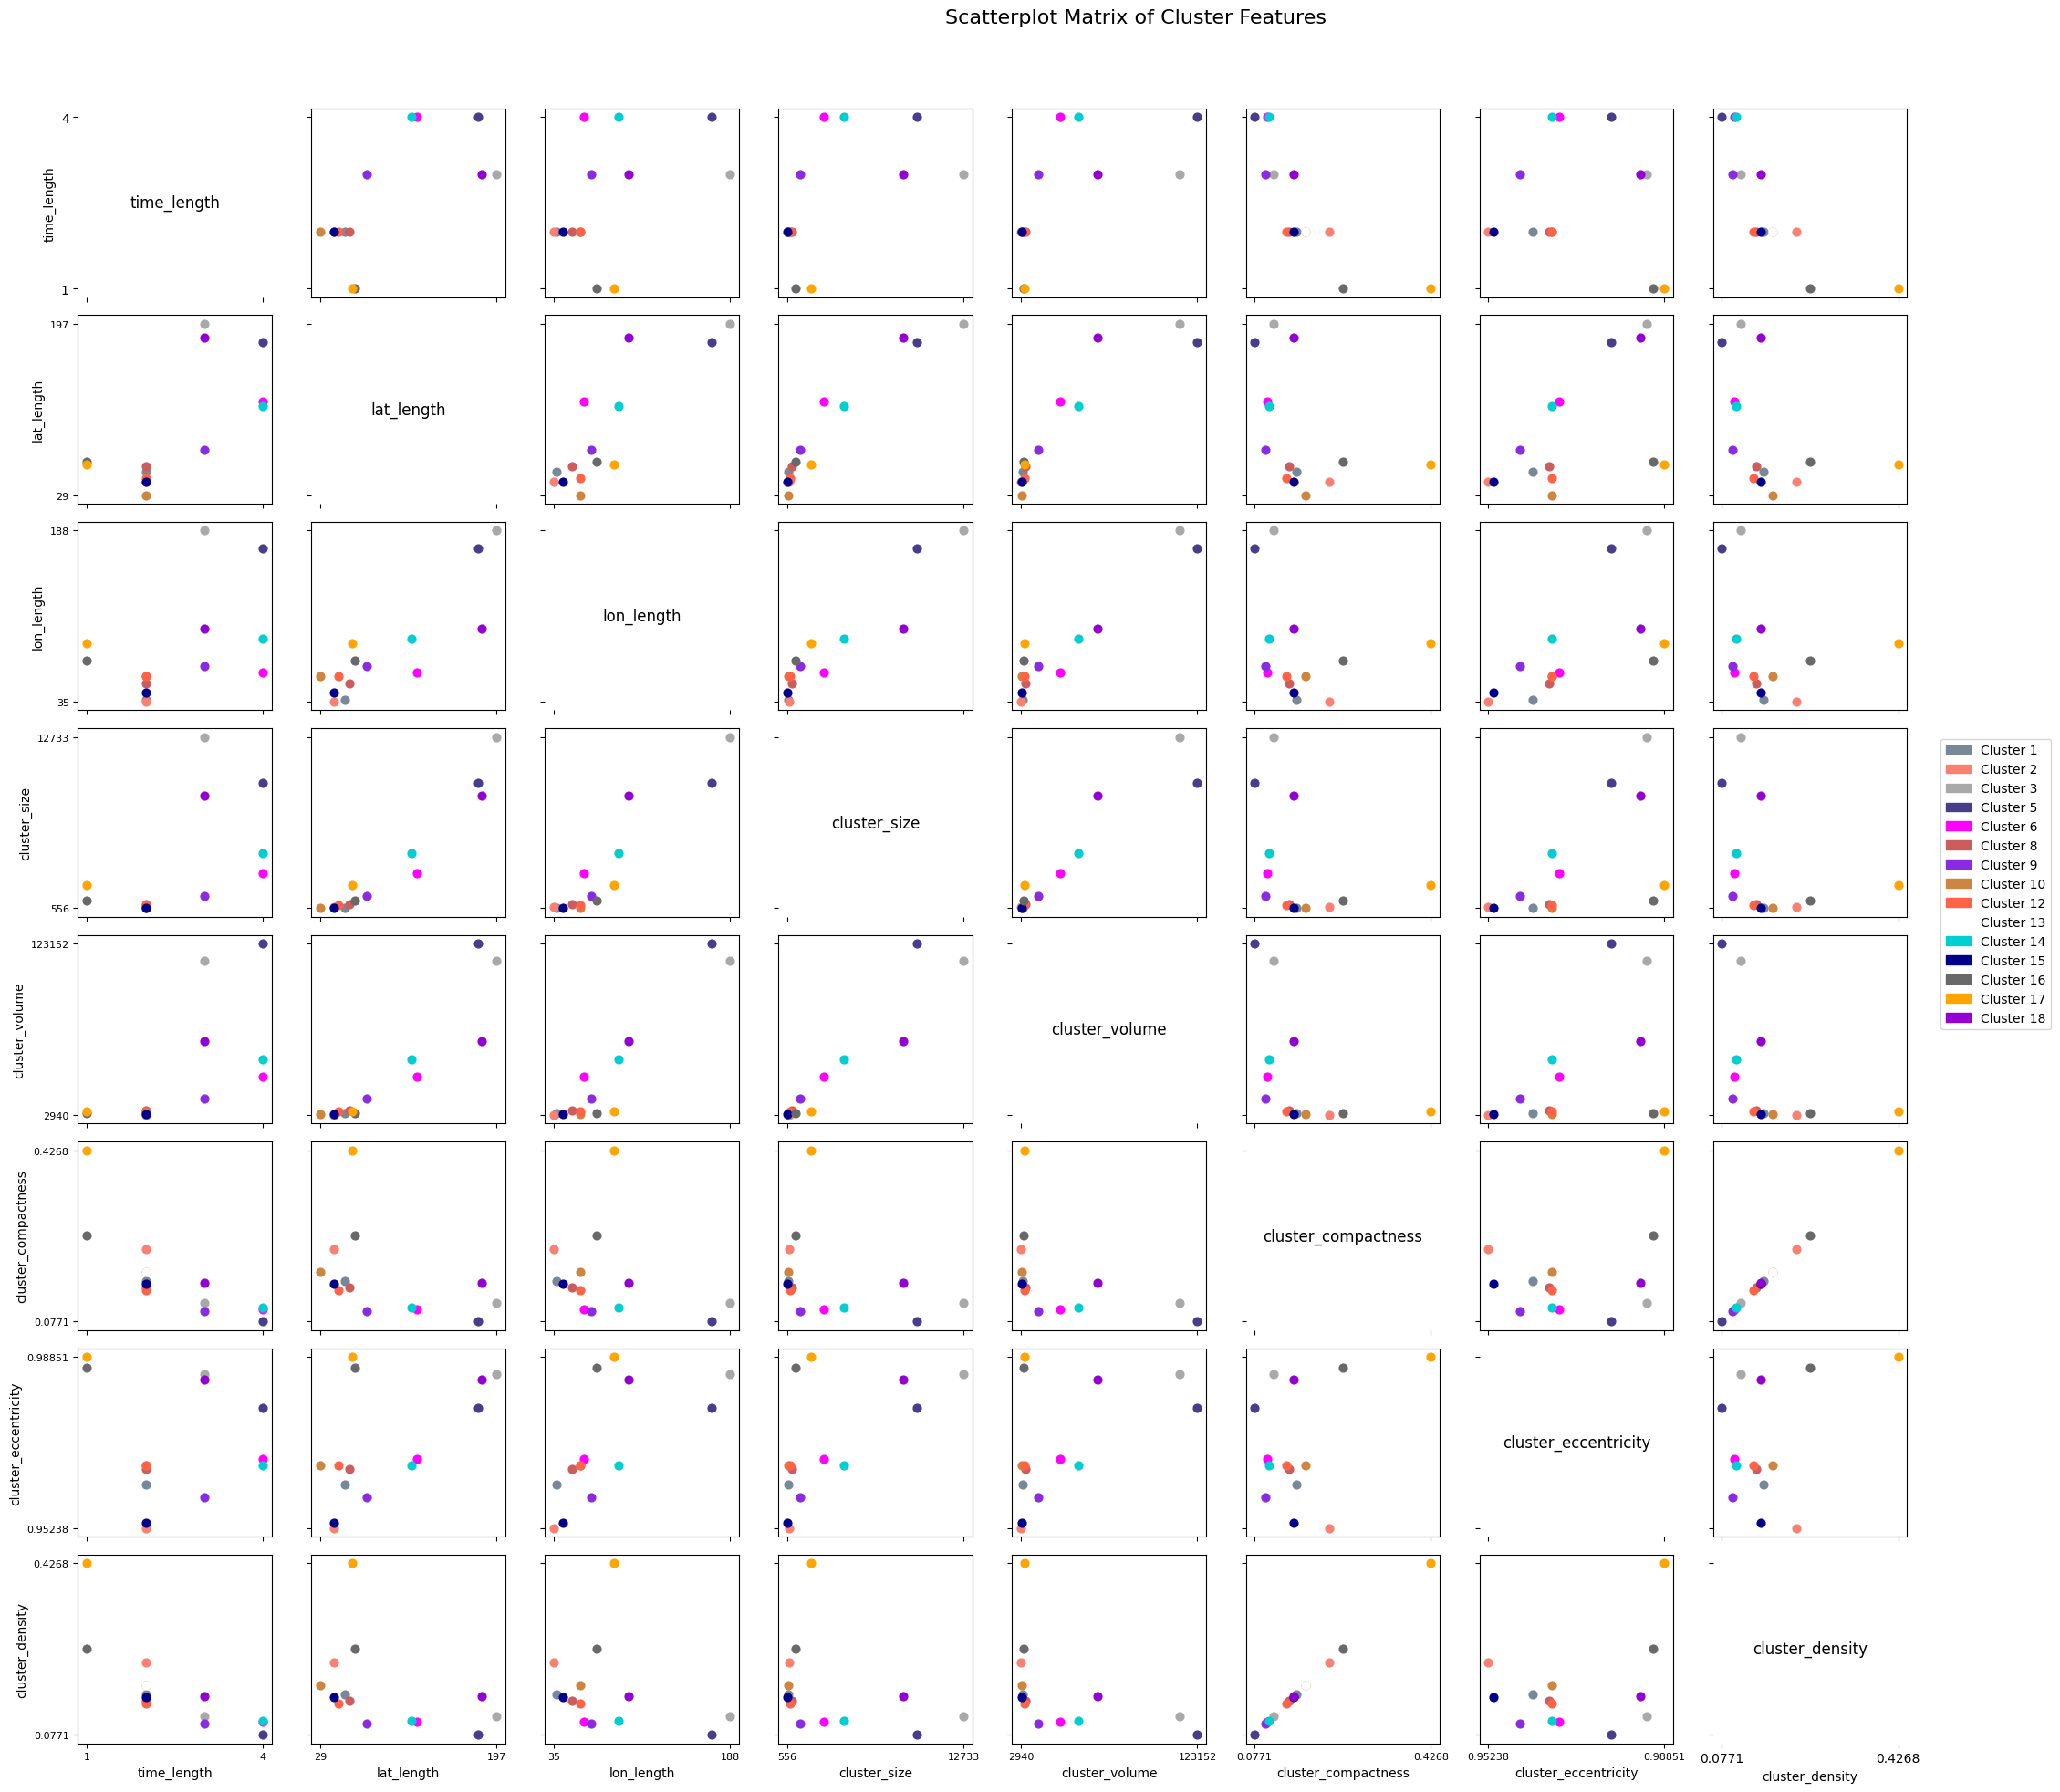




Experiment: Base Full Period
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_1_10_10_100_1000.pkl
     time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
3            2.0        86.0        73.0        1000.0         12556.0             0.079643              0.976744         0.079643
4            2.0       123.0       122.0        5093.0         30012.0             0.169699              0.983740         0.169699
5            2.0        64.0        61.0         890.0          7808.0             0.113986              0.968750         0.113986
6            4.0        93.0       207.0        5083.0         77004.0             0.066010              0.980676         0.066010
7            2.0        47.0        47.0         490.0          4418.0             0.110910              0.957447         0.110910
11           2.0        55.0        39.0         472.0          4290.0             0.110023              

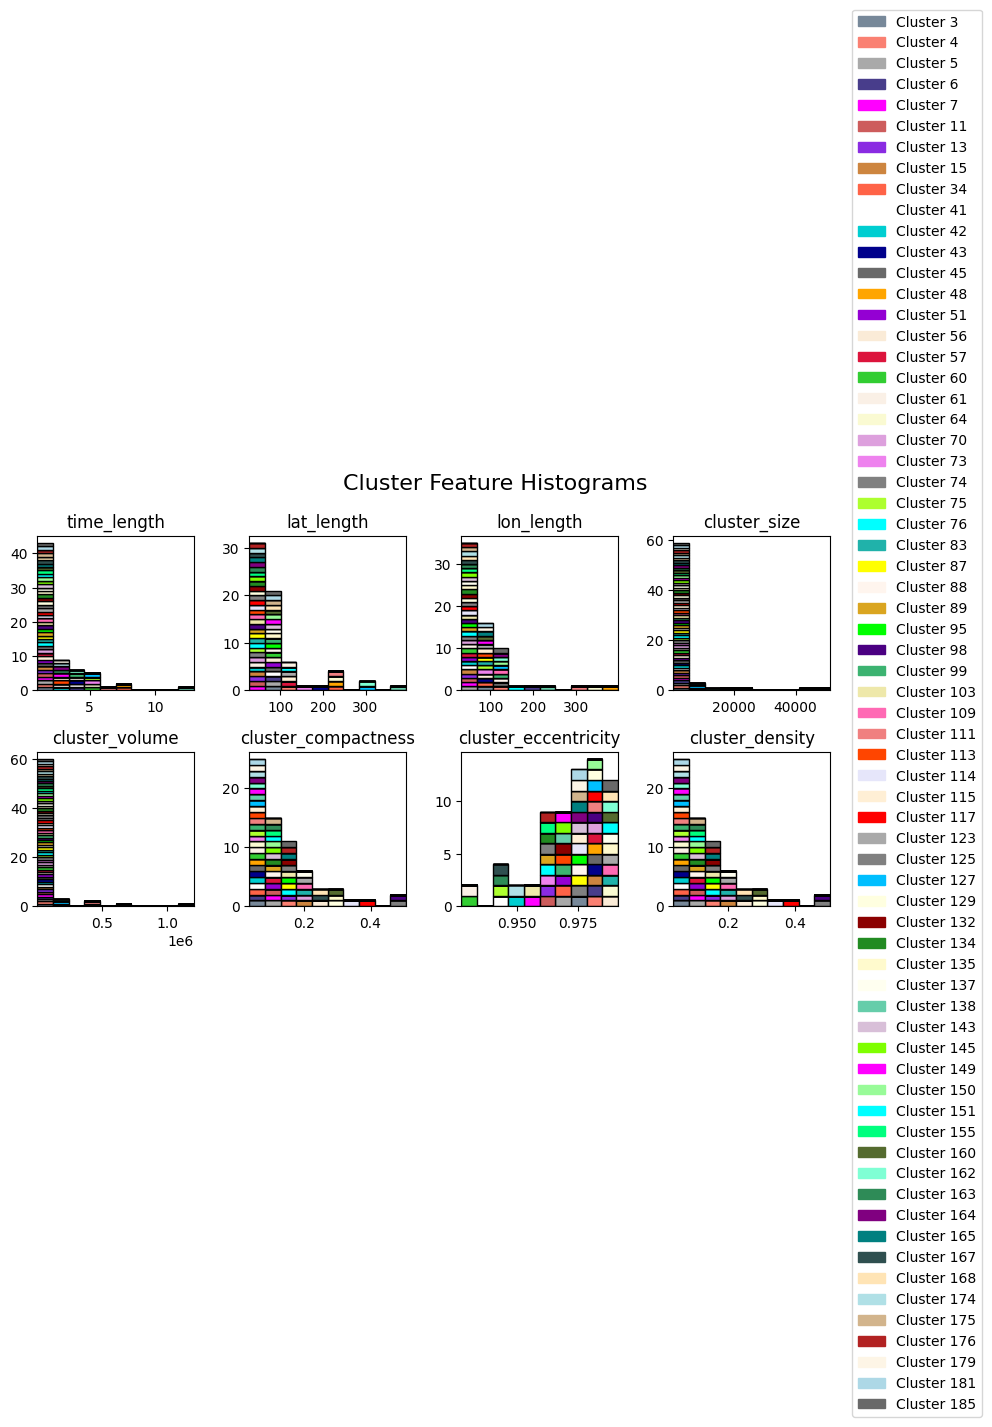

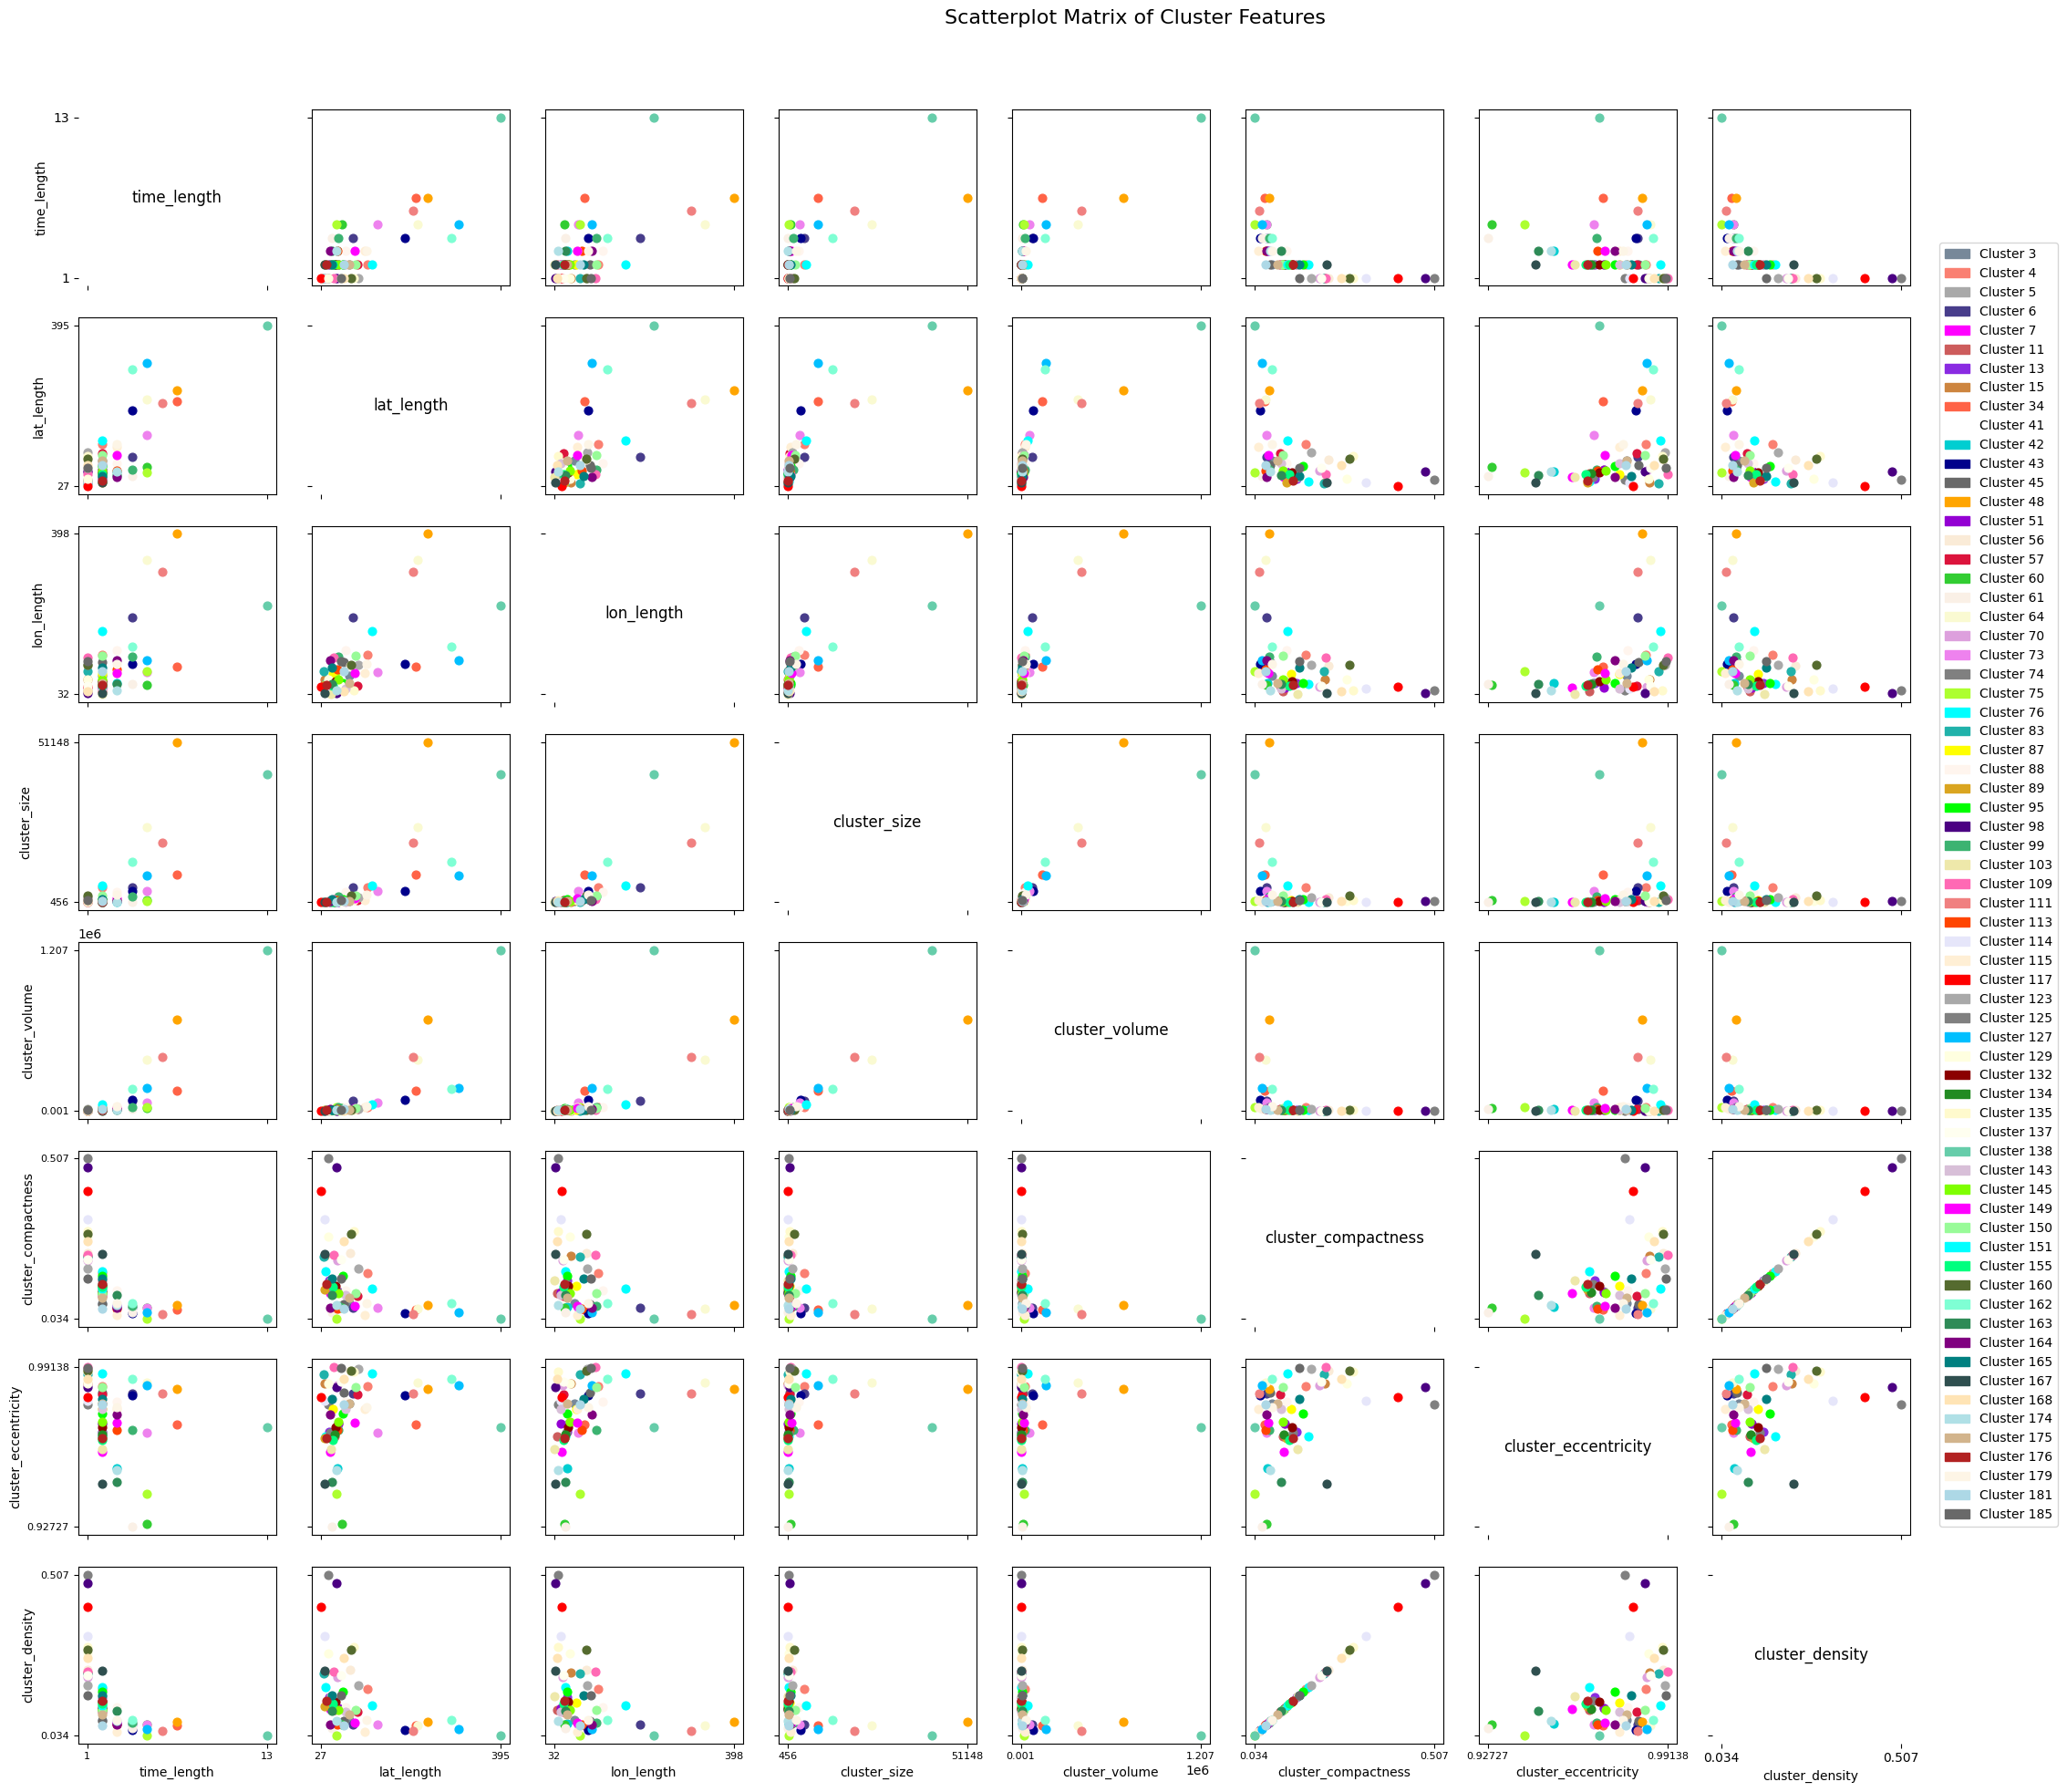




Experiment: Larger Min Neighbors
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_1_20_20_500_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        59.0        54.0         743.0          6372.0             0.116604              0.966102         0.116604
2           3.0       132.0       133.0        5258.0         52668.0             0.099833              0.977444         0.099833
3           2.0        70.0        66.0         891.0          9240.0             0.096429              0.971429         0.096429
4           4.0        95.0       186.0        5057.0         70680.0             0.071548              0.978495         0.071548
5           2.0        56.0        57.0         651.0          6384.0             0.101974              0.964912         0.101974
6           6.0       222.0       108.0        8867.0        143856.0             0.061638              0.9

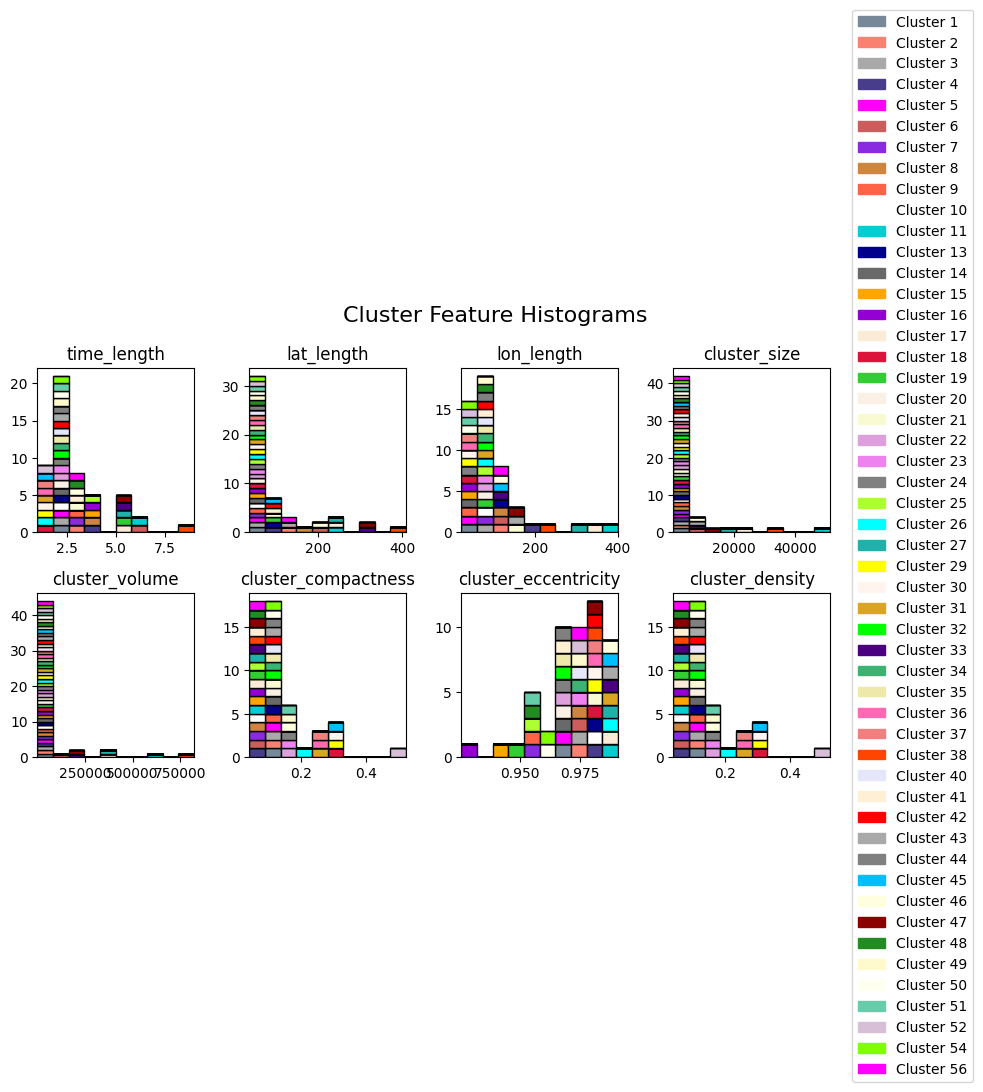

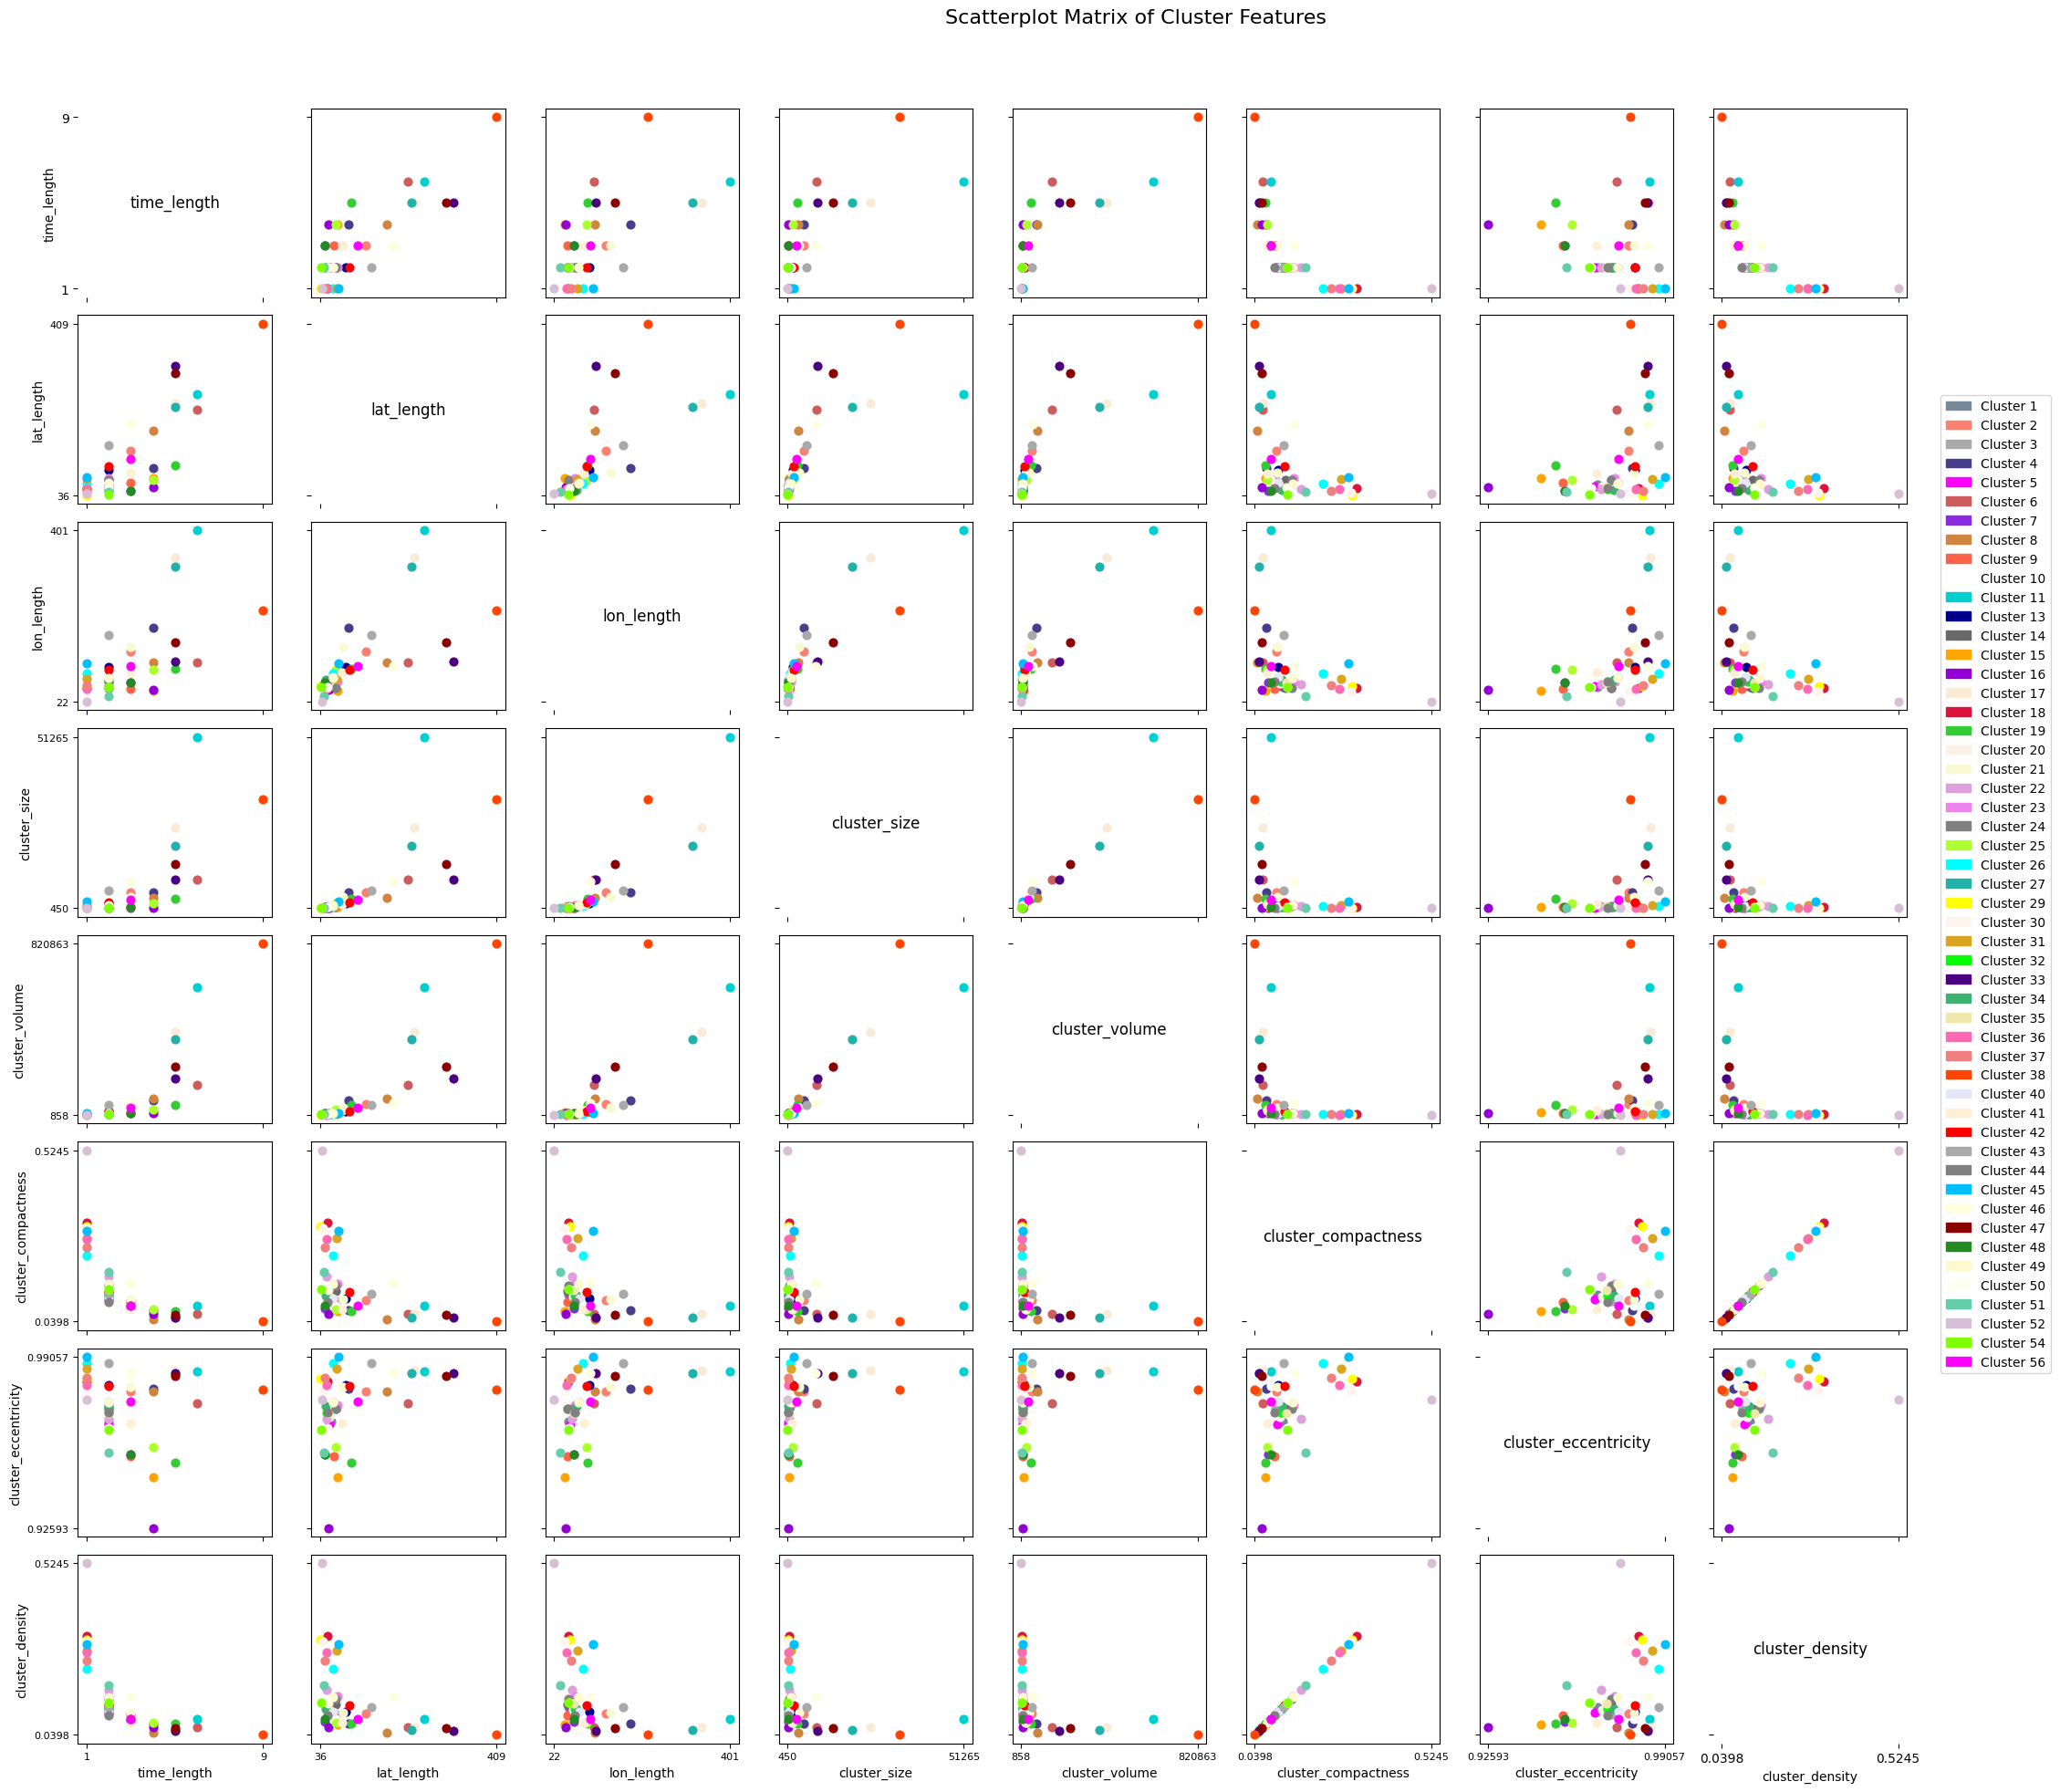




Experiment: Much Larger Min Neighbors
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_1_20_20_1000_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0       102.0       109.0        4597.0         22236.0             0.206737              0.981651         0.206737
2           4.0        70.0        85.0        3271.0         23800.0             0.137437              0.952941         0.137437
3           5.0        90.0        89.0        5025.0         40050.0             0.125468              0.944444         0.125468
4           6.0       253.0       302.0       49407.0        458436.0             0.107773              0.980132         0.107773
5           1.0        22.0        43.0         601.0           946.0             0.635307              0.976744         0.635307
6           3.0        95.0        84.0        3254.0         23940.0             0.135923           

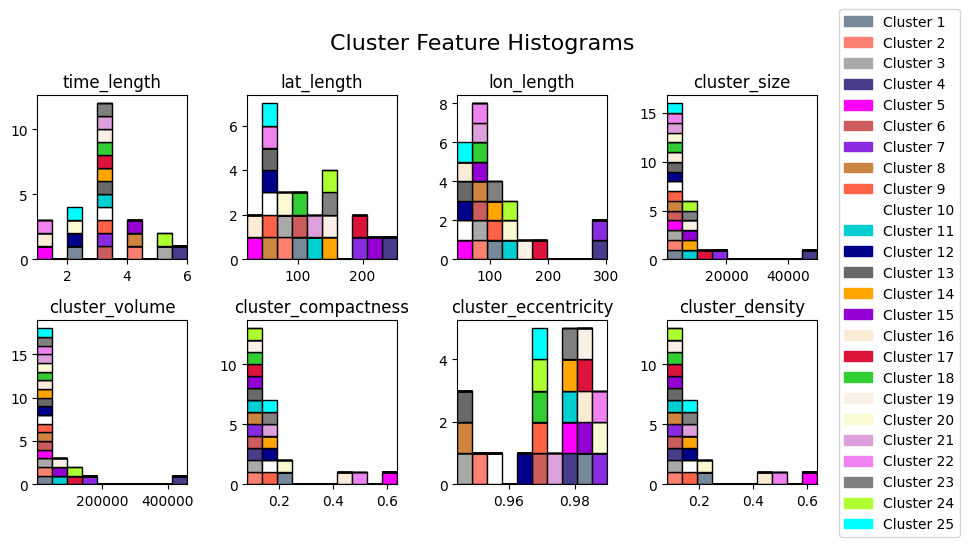

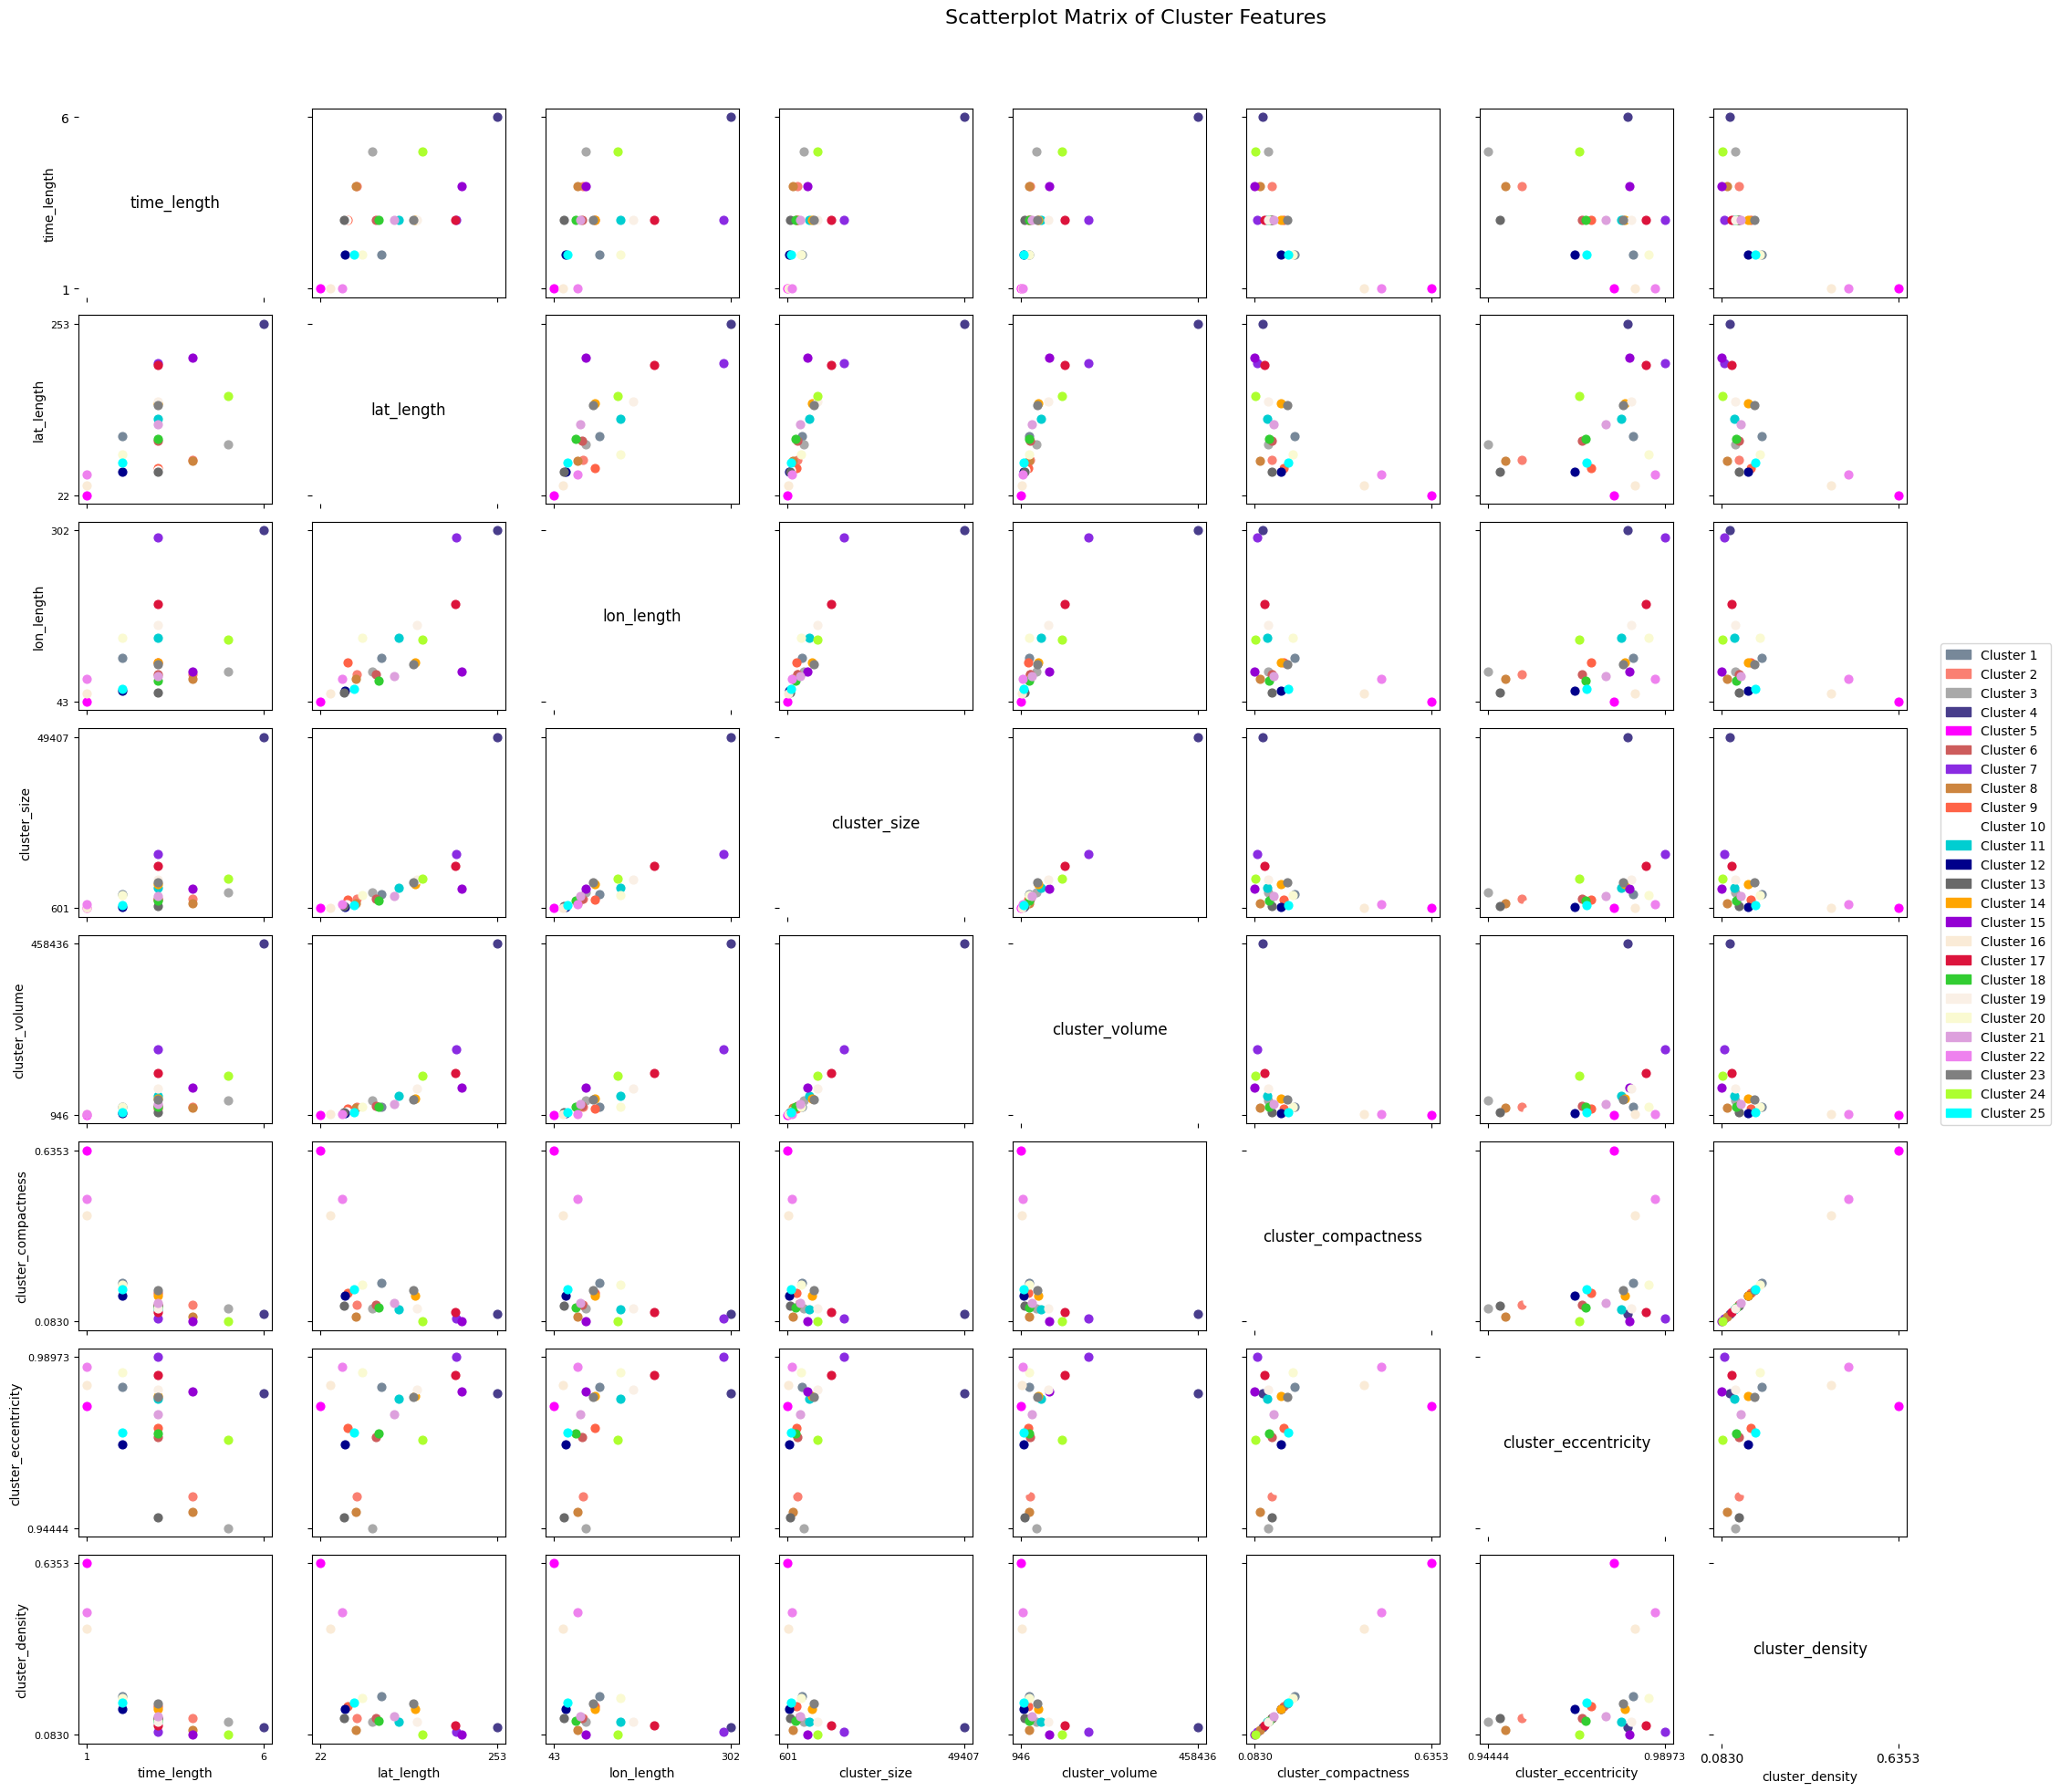




Experiment: Smaller Geo Eps
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_1_10_10_500_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        16.0        19.0          69.0           608.0             0.113487              0.894737         0.113487
2           4.0        56.0        44.0        2889.0          9856.0             0.293121              0.928571         0.293121
4           5.0       172.0       153.0       27500.0        131580.0             0.208998              0.970930         0.208998
5           5.0        78.0       183.0       14254.0         71370.0             0.199720              0.972678         0.199720
6           3.0        32.0        23.0         543.0          2208.0             0.245924              0.906250         0.245924
7           3.0        49.0        40.0        1640.0          5880.0             0.278912              0.938776

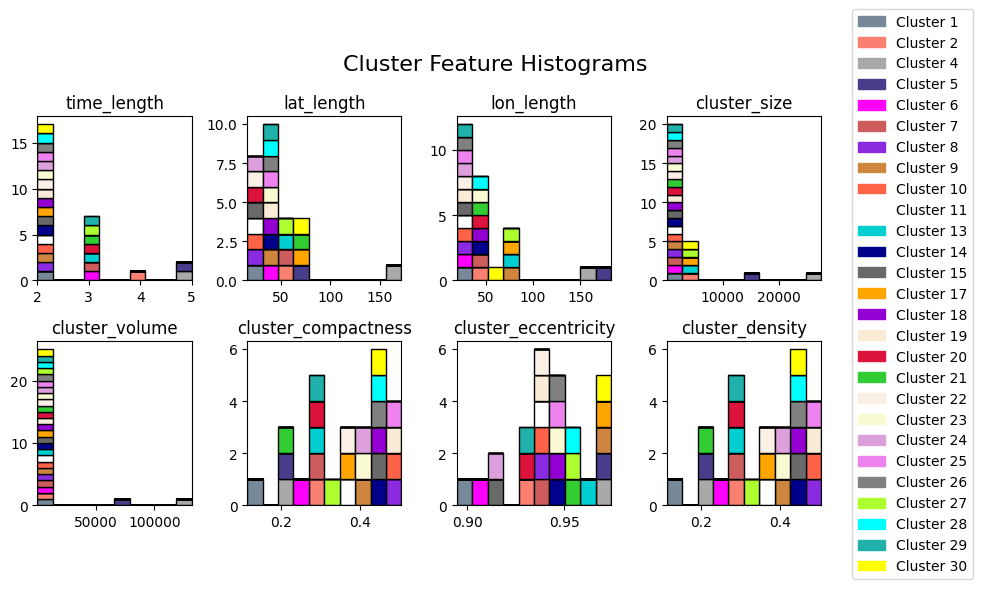

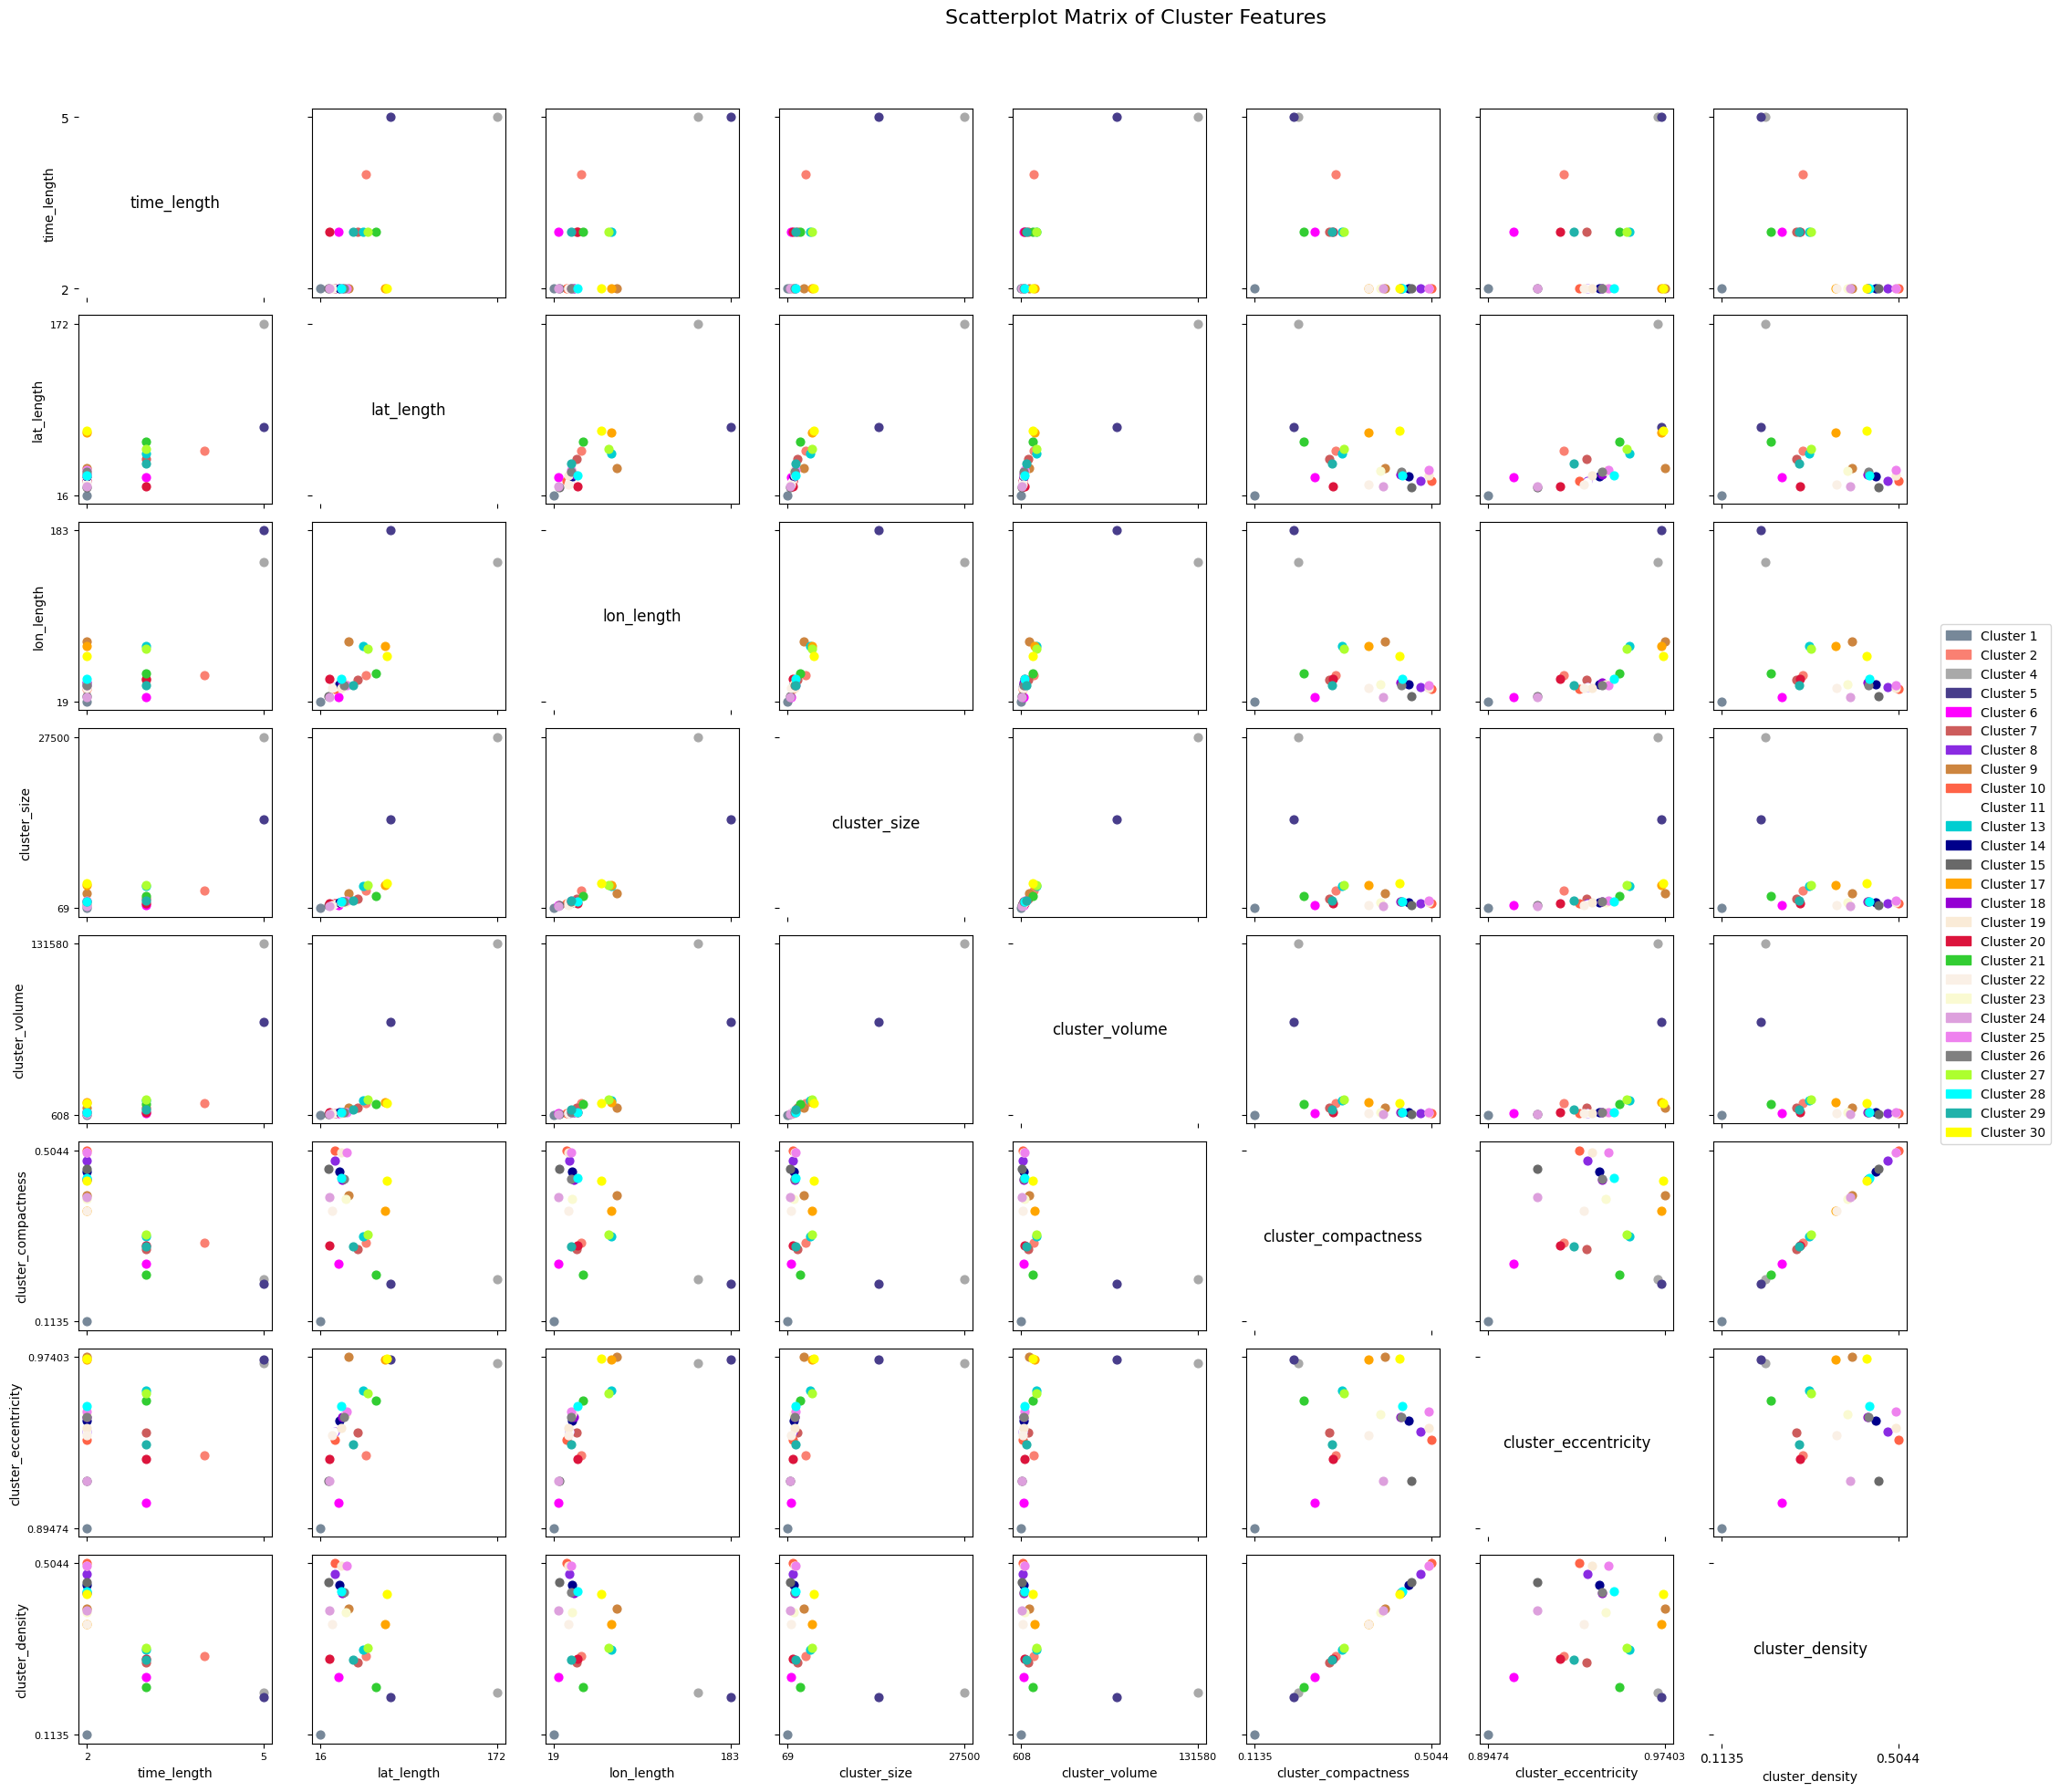




Experiment: Larger Time Eps
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_2_20_20_500_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        59.0        54.0         743.0          6372.0             0.116604              0.966102         0.116604
2           4.0       133.0       133.0        5293.0         70756.0             0.074806              0.969925         0.074806
3           2.0        70.0        66.0         891.0          9240.0             0.096429              0.971429         0.096429
4           6.0        95.0       186.0        5091.0        106020.0             0.048019              0.967742         0.048019
5           2.0        56.0        57.0         651.0          6384.0             0.101974              0.964912         0.101974
6           7.0       239.0       108.0        9717.0        180684.0             0.053779              0.970711

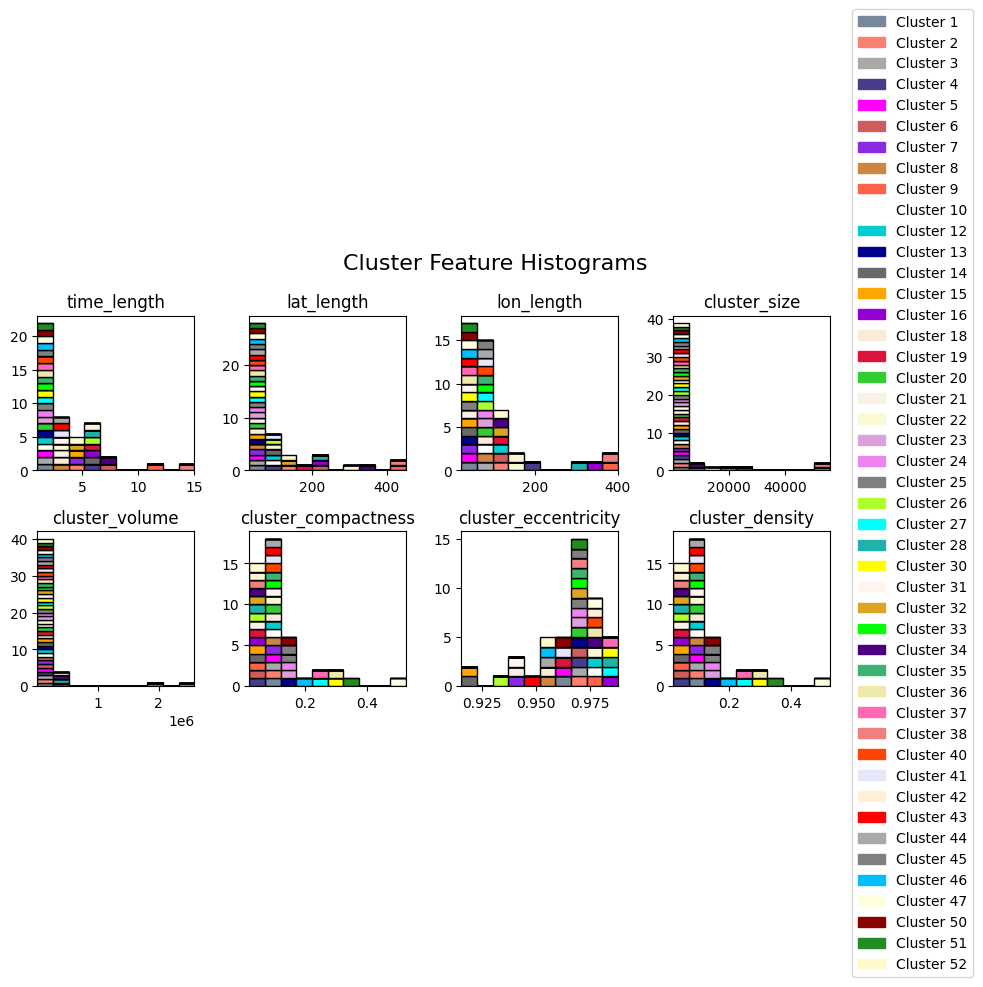

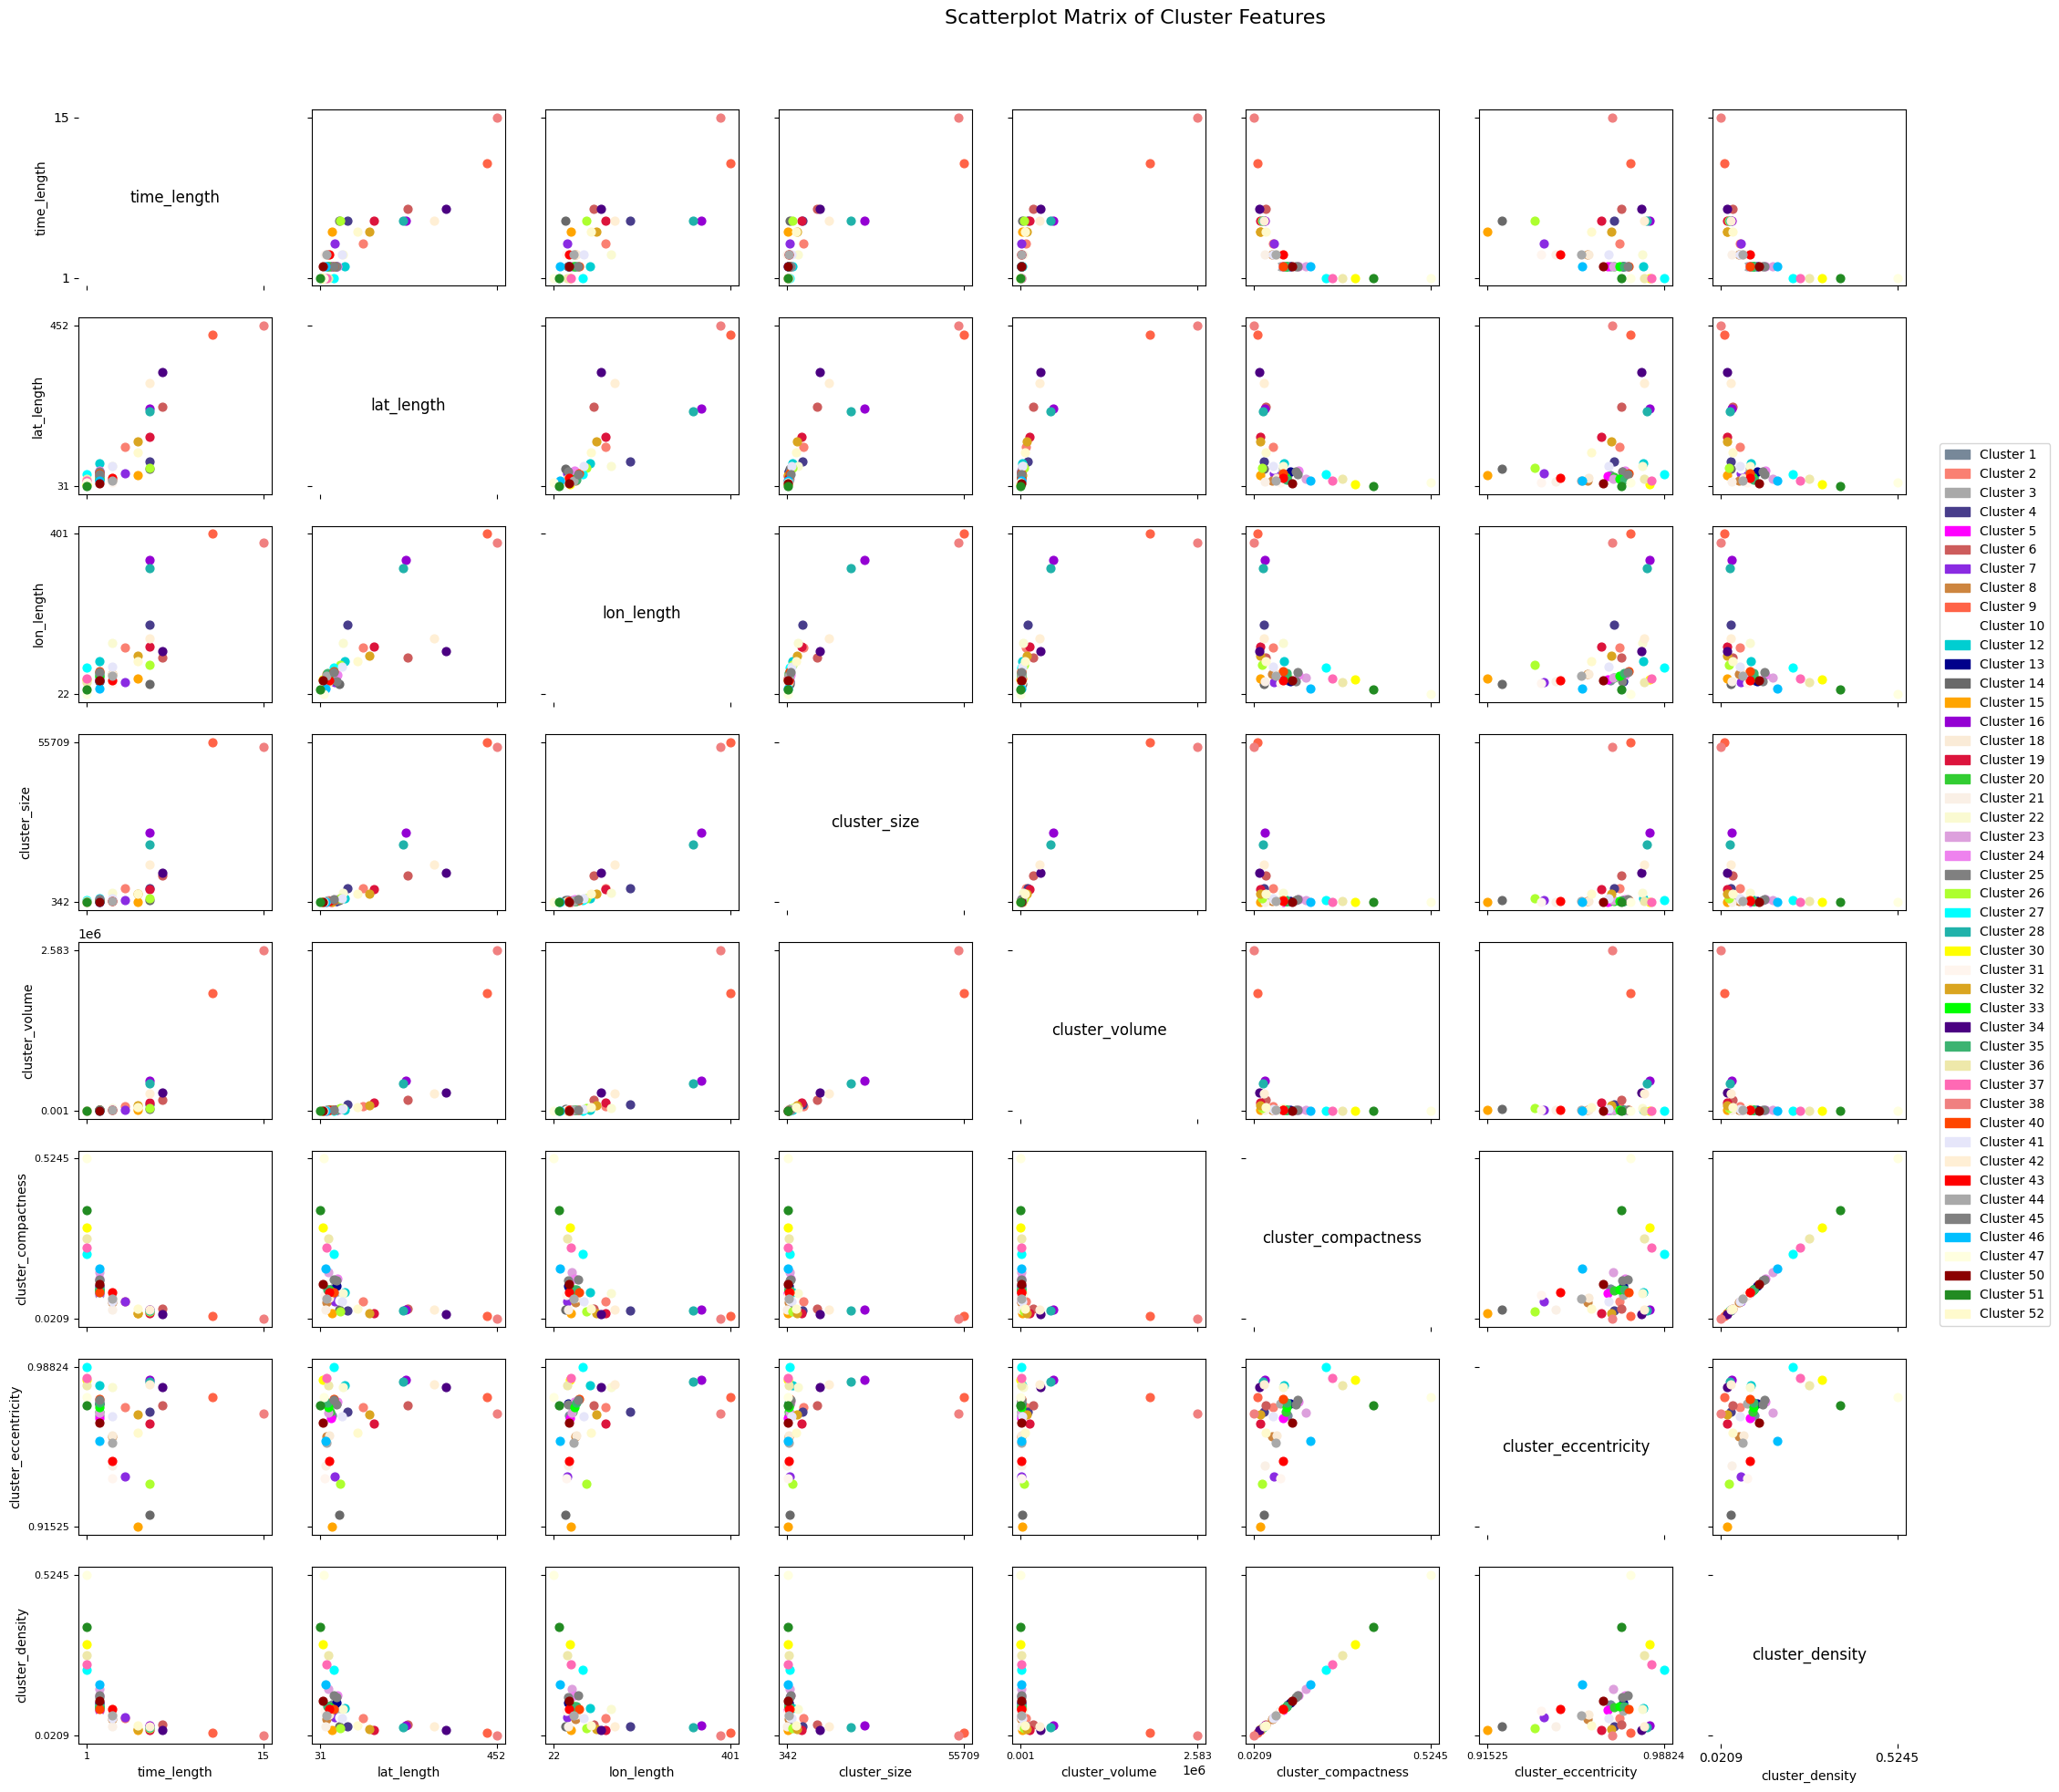




Experiment: Much Larger Time Eps
File: clustering_experiment_2002-08-01_2024-07-01_sst_2_12_20_20_500_1000.pkl
    time_length  lat_length  lon_length  cluster_size  cluster_volume  cluster_compactness  cluster_eccentricity  cluster_density
1           2.0        59.0        54.0         743.0          6372.0             0.116604              0.966102         0.116604
2         104.0       433.0       401.0       75888.0      18057832.0             0.004202              0.759815         0.004202
3          14.0        70.0        66.0         923.0         64680.0             0.014270              0.800000         0.014270
4          15.0       107.0       199.0        6411.0        319395.0             0.020072              0.924623         0.020072
5           7.0        40.0        43.0         433.0         12040.0             0.035963              0.837209         0.035963
6          20.0        63.0        57.0         700.0         71820.0             0.009747              0.

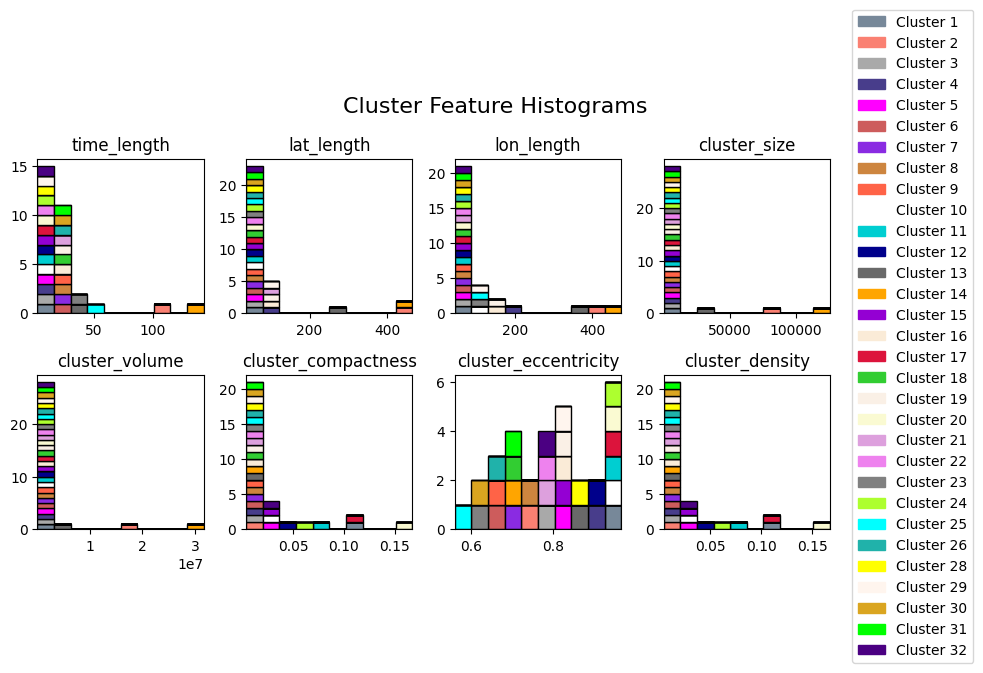

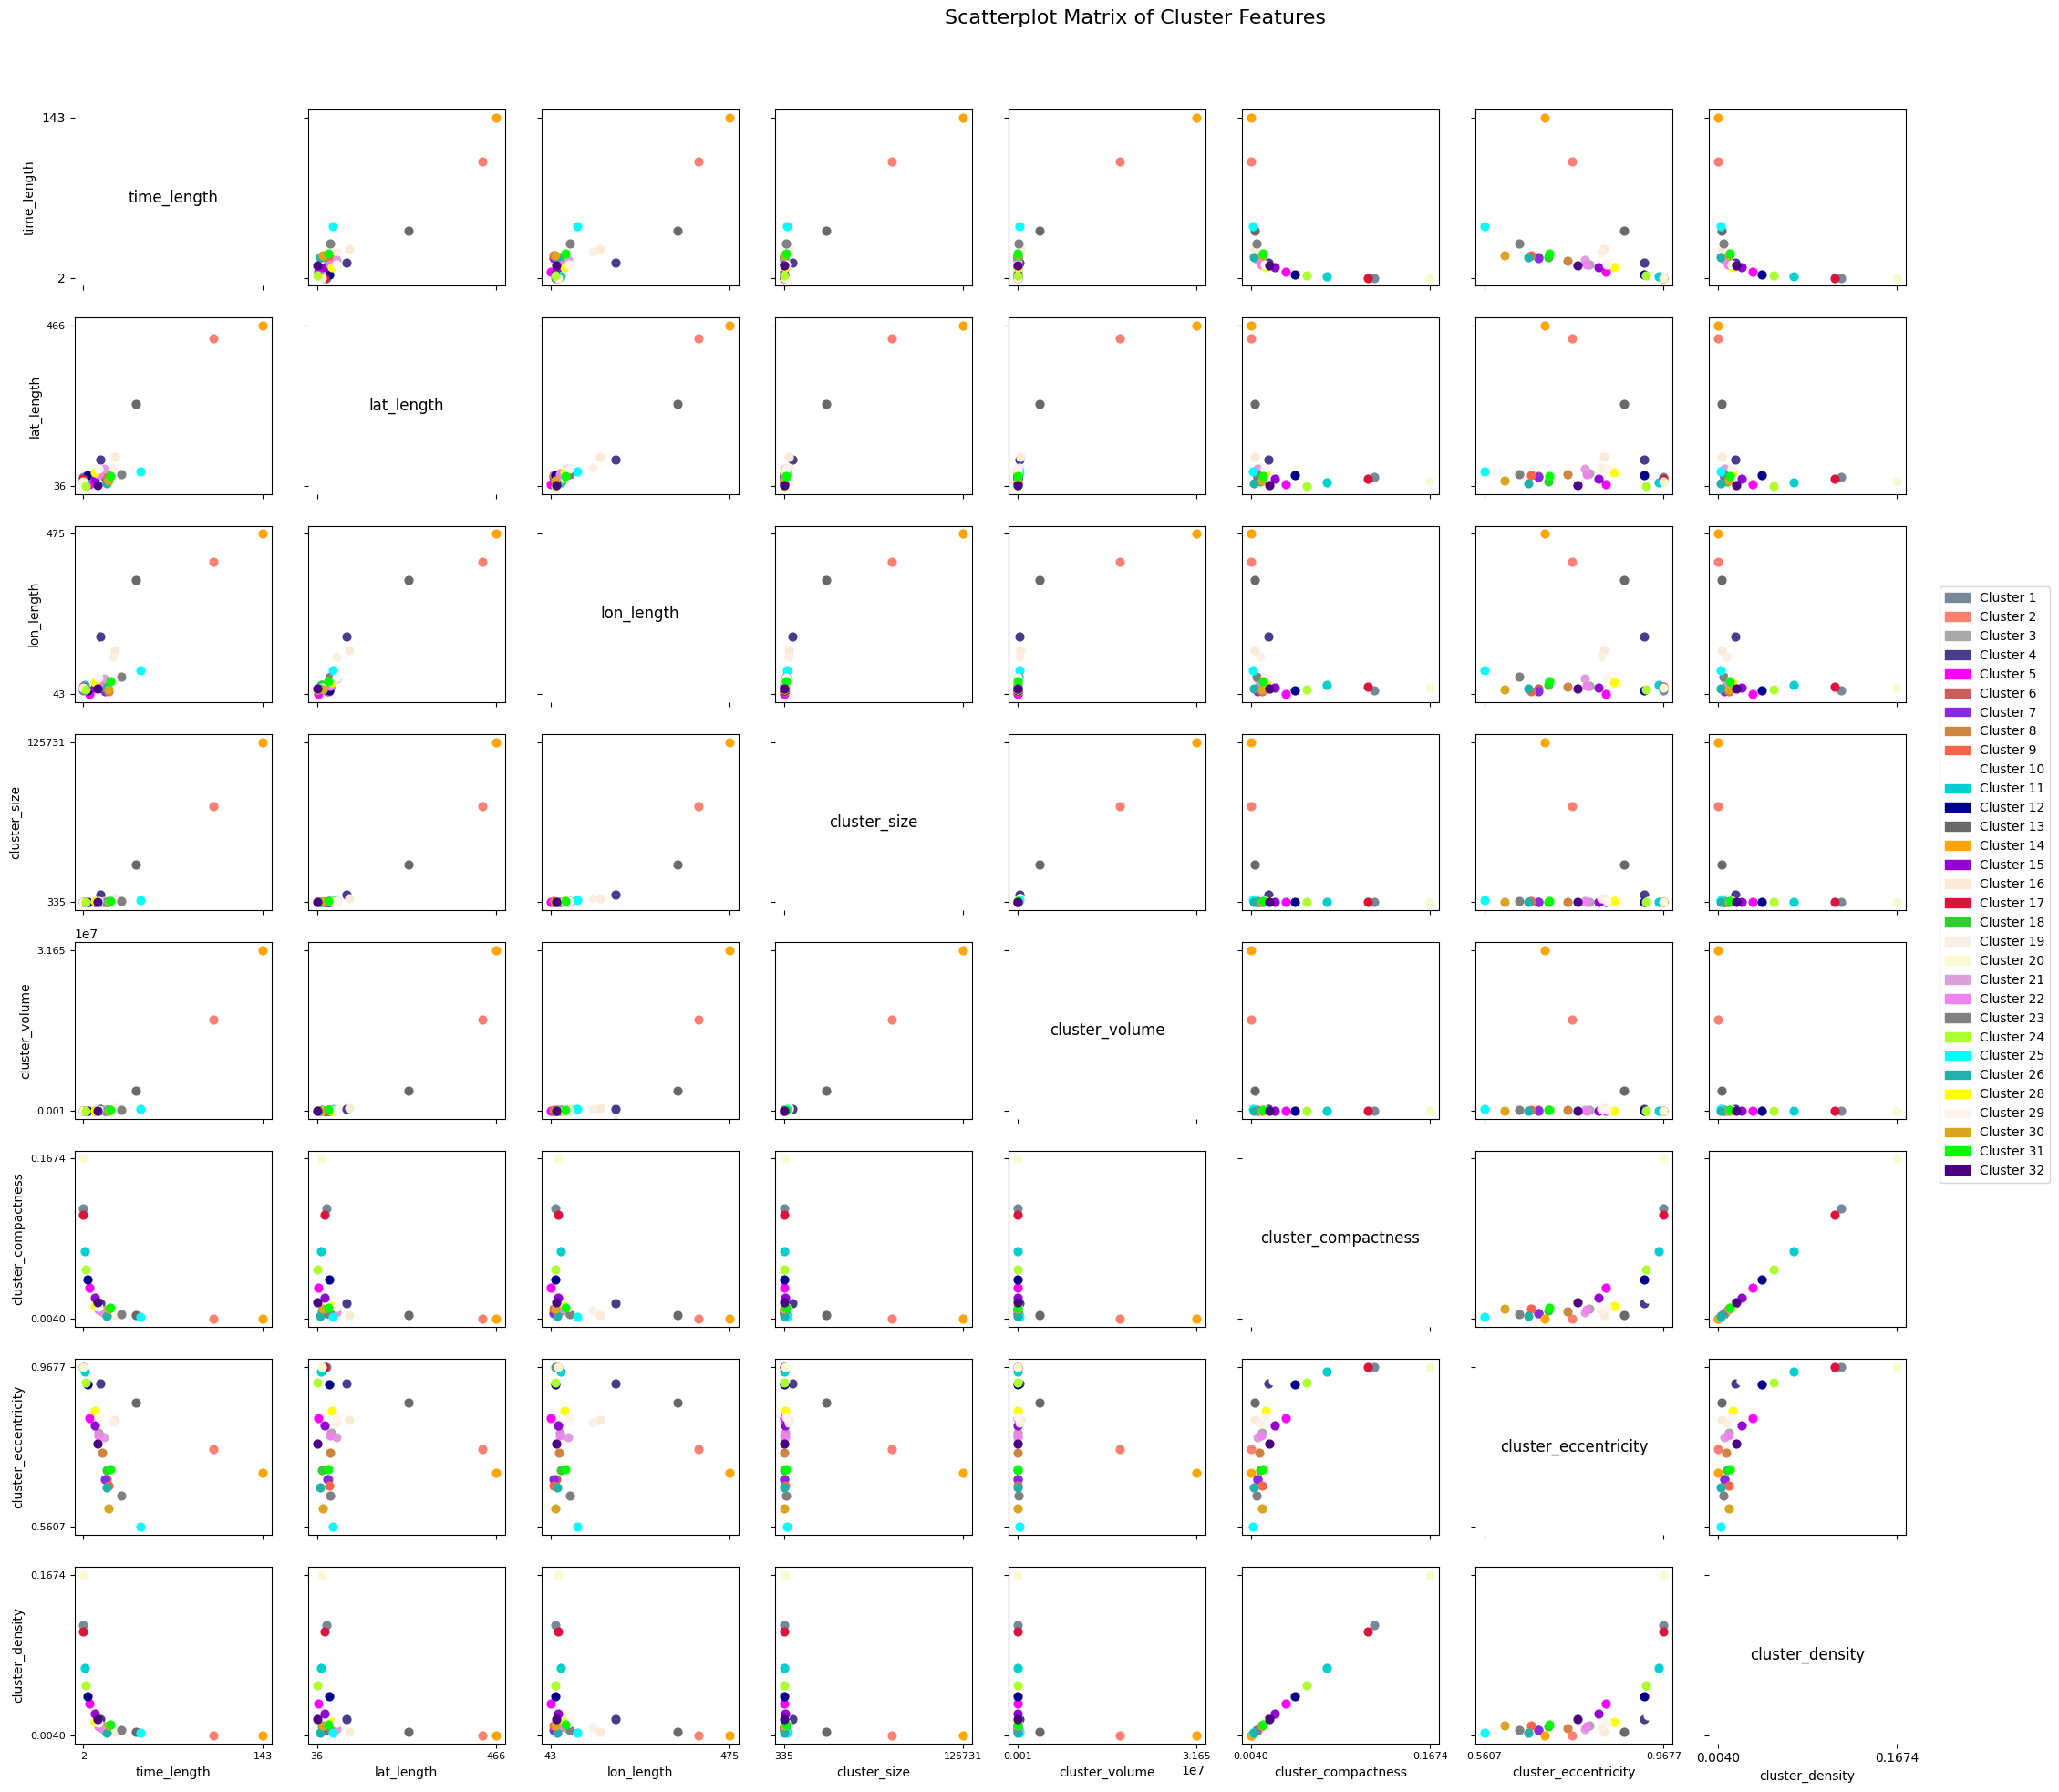

In [7]:
for experiment_feature in experiment_features:
    print(f"Experiment: {experiment_feature['experiment_name']}")
    print(f"File: {experiment_feature['file_name']}")
    plot_n_clustering_experiment_feature_report(experiment_feature['features'])
    print("\n\n")